<a href="https://colab.research.google.com/github/kevindelgado08/Circuitry-Grouping-of-Electricity-Distribution-Networks-in-Costa-Rica/blob/main/Proyecto1_KevinDelgadoRojas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Agrupamiento de circuitos de distribución eléctrica**

### Proyecto 1 - IE0435 Inteligencia Artificial aplicada a la Ingeniería Eléctrica

Por: Kevin Delgado Rojas - B82566
El método de agrupamiento seleccionado para realizar el agrupamiento de los datos es **K-medias**.

## Paso 1. Probar la implementación del códido sugerido dado en la referencia.

A continuación se muestra el ejemplo de la referencia, con fines de probar el algortimo y familiarizarse a este.

### Código sugerido para K-means:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

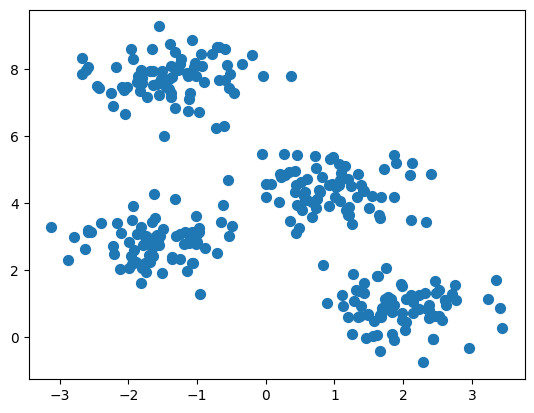

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

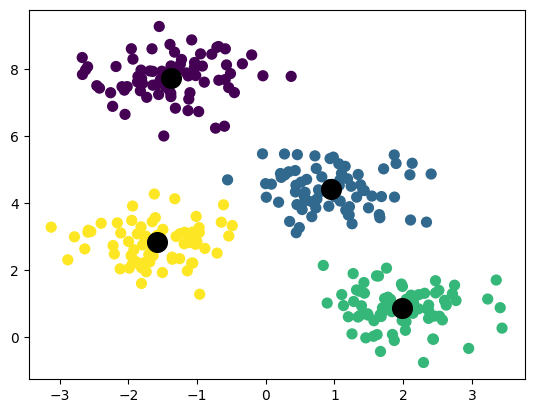

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);

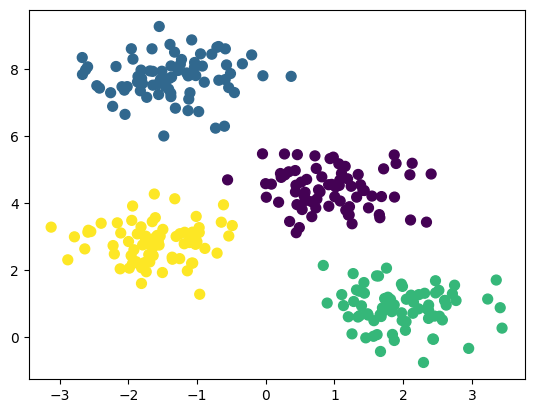

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### Código sugerido para Mini Batch K-means:


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs

# Load data in X
batch_size = 45
centers = [[1, 1], [-2, -1], [1, -2], [1, 9]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples = 3000,
							centers = centers,
							cluster_std = 0.9)

# perform the mini batch K-means
mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 4,
					batch_size = batch_size, n_init = 10,
					max_no_improvement = 10, verbose = 0)

mbk.fit(X)
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis = 0)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)

# print the labels of each data
print(mbk_means_labels)


[1 1 1 ... 3 3 0]


## Paso 2. Comentar en español el código en Python dado en la referencia.

A continuacion se presenta el código anterior comentado al idioma español.

### Código del algoritmo K-means:

In [ ]:
# Importación de bibliotecas necesarias
import matplotlib.pyplot as plt  # Para la creación de gráficos
import numpy as np  # Para operaciones matemáticas y numéricas
from sklearn.datasets import make_blobs  # Para generar datos de muestra

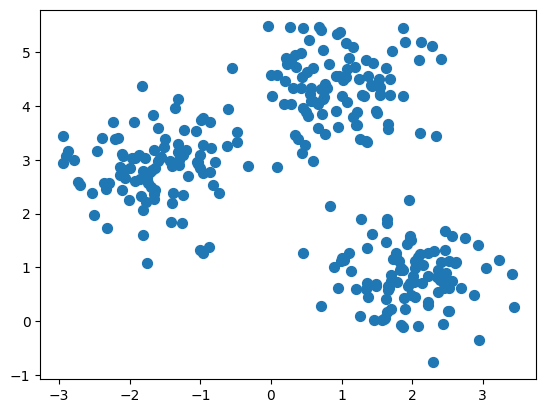

In [ ]:
# Generación de datos de muestra
X, y_true = make_blobs(n_samples=300, centers=3,
                       cluster_std=0.60, random_state=0)
# X contiene las coordenadas de los puntos de datos, y_true son las etiquetas verdaderas

# Visualización de los datos de muestra
plt.scatter(X[:, 0], X[:, 1], s=50)
# Crear un gráfico de dispersión para visualizar los datos

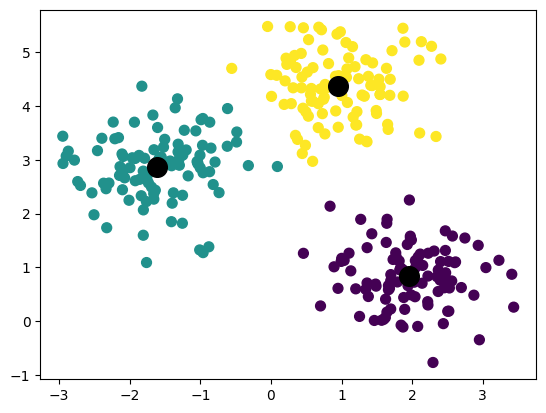

In [ ]:
# Uso del algoritmo K-Means de scikit-learn
from sklearn.cluster import KMeans

# Creación de una instancia de K-Means con 3 clusters
kmeans = KMeans(n_clusters=3)

# Ajuste del modelo K-Means a los datos
kmeans.fit(X)

# Predicción de las etiquetas de los clusters para cada punto
y_kmeans = kmeans.predict(X)

# Visualización de los resultados de K-Means
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
# Los puntos se colorean según la pertenencia a los clusters encontrados por K-Means

# Obtenemos los centros de los clusters
centers = kmeans.cluster_centers_

# Visualización de los centros de los clusters
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200)
# Los centros se muestran como puntos negros en el gráfico

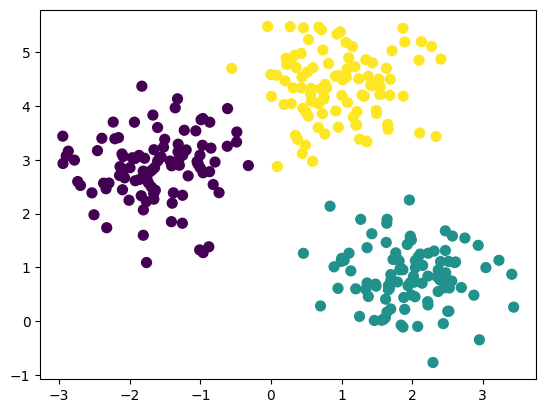

In [ ]:
# Importación de función para calcular asignación de puntos al cluster más cercano
from sklearn.metrics import pairwise_distances_argmin

# Implementación personalizada de K-Means
def find_clusters(X, n_clusters, rseed=2):
    # 1. Elegimos clusters al azar
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. Asignamos etiquetas basadas en el centro más cercano
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Encontramos nuevos centros a partir de las medias de los puntos
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. Comprobamos si ha convergido
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

# Llamada a la función de K-Means personalizado
centers, labels = find_clusters(X, 3)

# Visualización de los resultados de K-Means personalizado
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
# Los puntos se colorean según las etiquetas de cluster calculadas por la función personalizada

# Mostramos el gráfico final
plt.show()

### Código del algoritmo Mini Batch K-means:



In [ ]:
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs

# Cargar datos en X
batch_size = 45
centers = [[1, 1], [-2, -1], [1, -2], [1, 9]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000,
                            centers=centers,
                            cluster_std=0.9)

# Realizar el Mini Batch K-Means
mbk = MiniBatchKMeans(init='k-means++', n_clusters=4,
                      batch_size=batch_size, n_init=10,
                      max_no_improvement=10, verbose=0)

mbk.fit(X)
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis=0)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)

# Imprimir las etiquetas de cada dato
print(mbk_means_labels)


[3 1 0 ... 3 1 1]


## Paso 3. Implementación del algoritmo K-means para el conjunto de datos del Anexo A y Anexo B.


Primeramente, para *preprocesar* los datos se utiliza la biblioteca Pandas en Python, que permite crear DataFrames a partir de archivos CSV. Entonces, se importa Pandas y se carga el archivo AnexoA.csv en un DataFrame con pd.read_csv().

Asi mismo, se brinda unas estadisticas descriptivas del conjunto de datos.

In [ ]:
import pandas as pd

# Cargar los datos desde el archivo CSV
df = pd.read_csv('/home/AnexoA.csv')
df2 = pd.read_csv('/home/AnexoB.csv')

# Mostrar las primeras filas del DataFrame para explorar los datos
print('Para el Anexo A')
print(df.head())

# Obtener estadísticas descriptivas de los datos
print(df.describe())
print()
# Mostrar las primeras filas del DataFrame para explorar los datos
print('Para el Anexo B')
print(df2.head())

# Obtener estadísticas descriptivas de los datos
print(df2.describe())


Para el Anexo A
  Empresa             Circuito  Abonados   DPIR    FPI
0    CNFL  BRASIL-CIUDAD COLON      8430  17.04  19.85
1    CNFL      CAJA-INDUSTRIAS      2189  16.36  11.93
2    CNFL   ELECTRIONA-MONTANA       821  15.90  10.15
3    CNFL       BARVA-CIPRESAL      3677  15.76   7.54
4    CNFL    CORONADO-CASCAJAL      9646  13.07  18.22
           Abonados       DPIR        FPI
count     96.000000  96.000000  96.000000
mean   10231.468750  15.803646  11.732188
std     8128.268402   9.168943   4.406844
min       12.000000   6.340000   7.140000
25%     4369.750000   9.270000   8.392500
50%     8392.000000  12.415000  10.340000
75%    14005.500000  20.622500  13.755000
max    41338.000000  57.280000  27.000000

Para el Anexo B
  Empresa               Circuito  Abonados  DPIR   FPI
0    ALFA             SECTOR SUR      2733  3.48  4.10
1    ALFA                   TORO       194  1.30  4.00
2    CNFL  DESAMPARADOS-RIO AZUL      6139  5.80  3.48
3    CNFL         HIGUITO-ASERRÍ     17

Para decidir el número de grupos, se utilizó el **método del codo** y **coeficiente de silueta** que nos permite visualizar de una manera mas fácil, cual es el posible número de grupos.




### Método del codo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

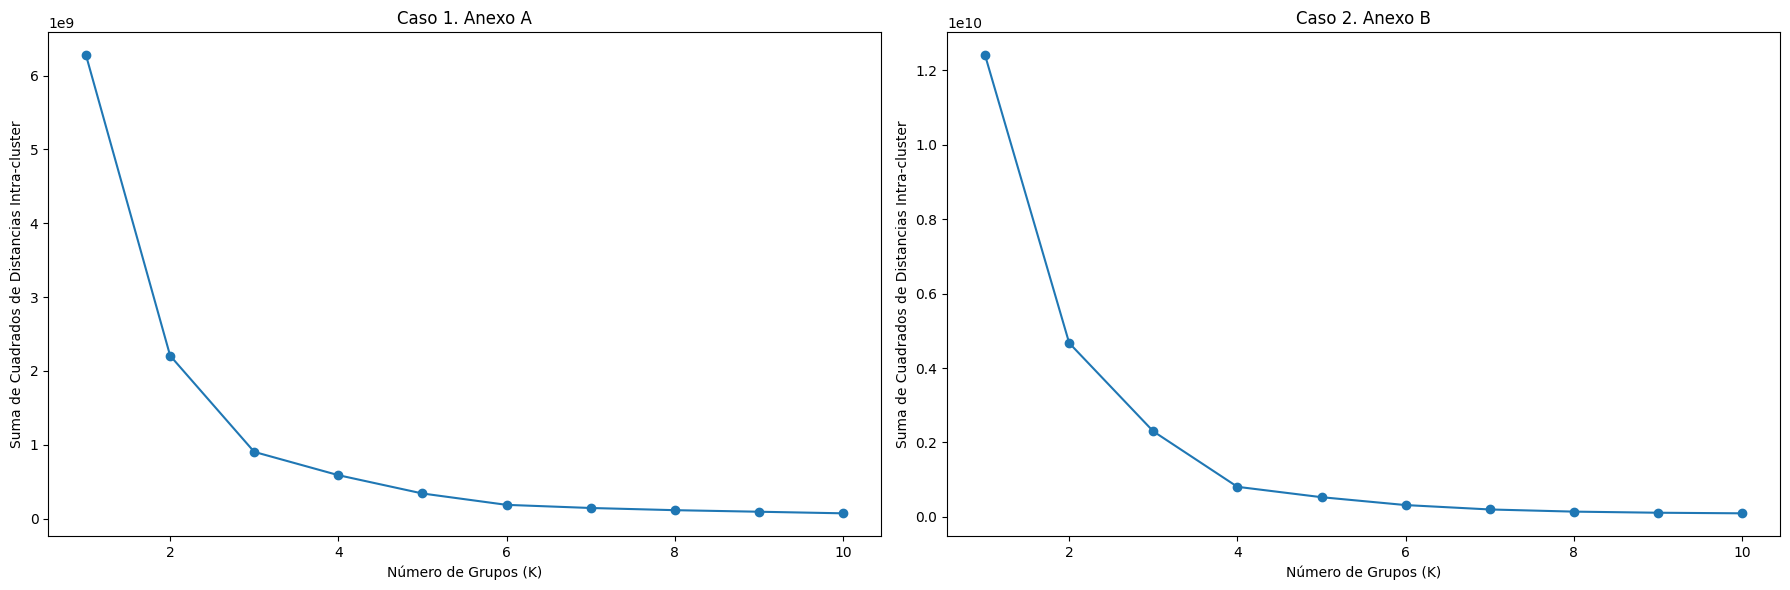

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Crear una lista vacía para almacenar las sumas de cuadrados para los tres diferentes casos
caso1 = []
caso2 = []


# Probar valores de K desde 1 hasta un número máximo
max_k = 10

# Crear una figura con tres subplots en una fila
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Para caso 1. Anexo A
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df[['Abonados', 'DPIR', 'FPI']])
    caso1.append(kmeans.inertia_)

# Graficar el método del codo para caso 1. Abonados-DPIR
axs[0].plot(range(1, max_k + 1), caso1, marker='o')
axs[0].set_xlabel('Número de Grupos (K)')
axs[0].set_ylabel('Suma de Cuadrados de Distancias Intra-cluster')
axs[0].set_title('Caso 1. Anexo A')

# Para caso 2. Anexo B
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df2[['Abonados', 'DPIR', 'FPI']])
    caso2.append(kmeans.inertia_)

# Graficar el método del codo para caso 2. Abonados-FPI
axs[1].plot(range(1, max_k + 1), caso2, marker='o')
axs[1].set_xlabel('Número de Grupos (K)')
axs[1].set_ylabel('Suma de Cuadrados de Distancias Intra-cluster')
axs[1].set_title('Caso 2. Anexo B')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura con los tres subplots
plt.show()

#Código para ocultar los warnings
import sys

if sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

### Método de coeficiente de silueta

For 2 clusters, Silhouette Score is 0.6030151491932391
For 3 clusters, Silhouette Score is 0.6122343891033052
For 4 clusters, Silhouette Score is 0.6181547252261278
For 5 clusters, Silhouette Score is 0.557477650389732
For 6 clusters, Silhouette Score is 0.6056317547230486
For 7 clusters, Silhouette Score is 0.5970720500664995
For 8 clusters, Silhouette Score is 0.5802819623896135
For 9 clusters, Silhouette Score is 0.5795564202530358
For 10 clusters, Silhouette Score is 0.5681837428264672

For 2 clusters, Silhouette Score is 0.7798643973701279
For 3 clusters, Silhouette Score is 0.6847719085325318
For 4 clusters, Silhouette Score is 0.7215850940228679
For 5 clusters, Silhouette Score is 0.6622148150253061
For 6 clusters, Silhouette Score is 0.6674065621002169
For 7 clusters, Silhouette Score is 0.6965844311619425
For 8 clusters, Silhouette Score is 0.696504447614278
For 9 clusters, Silhouette Score is 0.6905982037143412
For 10 clusters, Silhouette Score is 0.6968740327595137



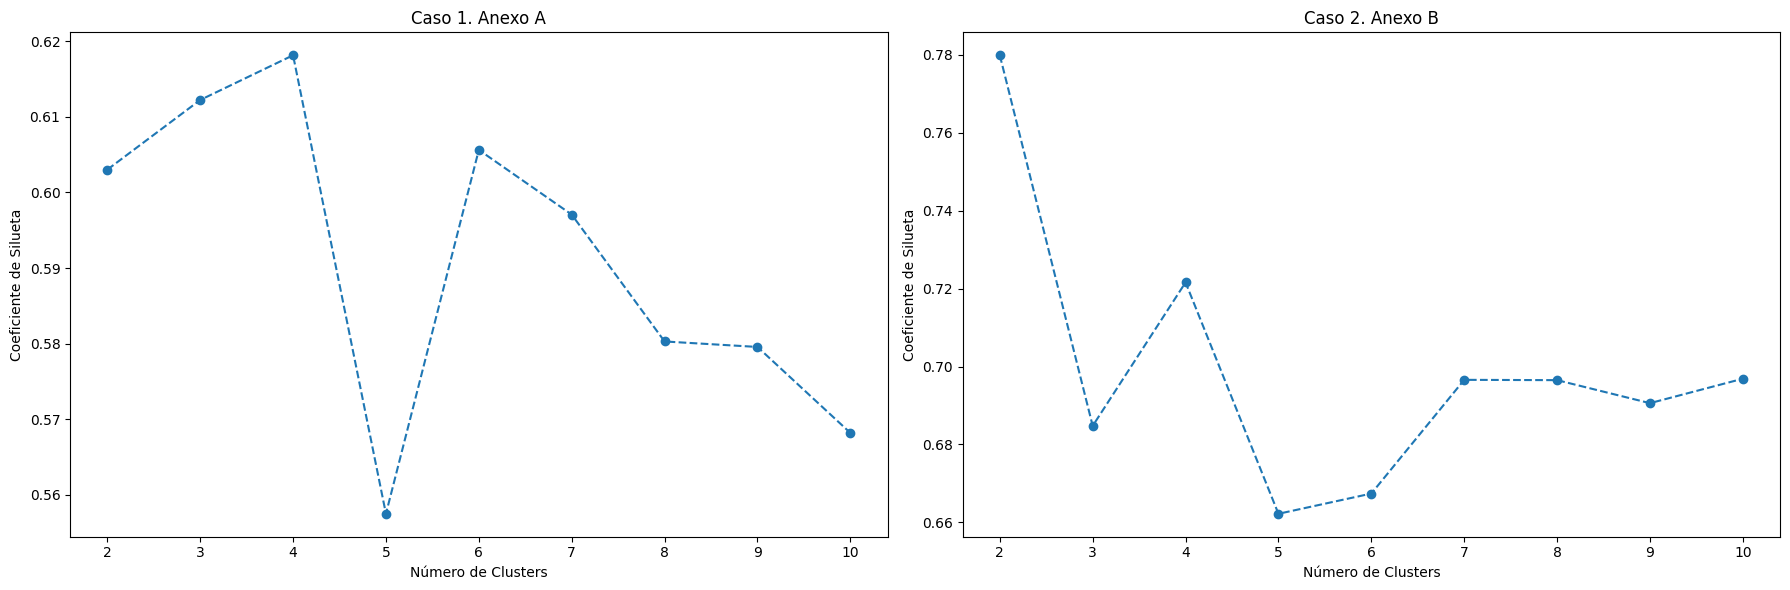

In [ ]:
from sklearn.metrics import silhouette_score

# Crear una figura con tres subplots en una fila
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Seleccionar las columnas
data1 = df[['Abonados', 'DPIR','FPI']]
data2 = df2[['Abonados', 'DPIR','FPI']]


silhouette_scores1 = []
silhouette_scores2 = []

# Para Caso Anexo A. Calcular el coeficiente de silueta para diferentes números de clusters
for n_clusters in range(2, 11):  # Prueba con 2 a 10 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(data1)
    silhouette_avg = silhouette_score(data1, labels, metric='euclidean')
    silhouette_scores1.append(silhouette_avg)
    print(f"For {n_clusters} clusters, Silhouette Score is {silhouette_avg}")

print()
# Graficar el número de clusters vs. Coeficiente de Silueta
axs[0].plot(range(2, 11), silhouette_scores1, marker='o', linestyle='--')
axs[0].set_xlabel("Número de Clusters")
axs[0].set_ylabel("Coeficiente de Silueta")
axs[0].set_title("Caso 1. Anexo A")

# Para Caso Anexo B. Calcular el coeficiente de silueta para diferentes números de clusters
for n_clusters in range(2, 11):  # Prueba con 2 a 10 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(data2)
    silhouette_avg = silhouette_score(data2, labels, metric='euclidean')
    silhouette_scores2.append(silhouette_avg)
    print(f"For {n_clusters} clusters, Silhouette Score is {silhouette_avg}")
print()

# Graficar el número de clusters vs. Coeficiente de Silueta
axs[1].plot(range(2, 11), silhouette_scores2, marker='o', linestyle='--')
axs[1].set_xlabel("Número de Clusters")
axs[1].set_ylabel("Coeficiente de Silueta")
axs[1].set_title("Caso 2. Anexo B")

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura con los tres subplots
plt.show()

#Código para ocultar los warnings
import sys

if sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

### Visualizador del coeficiente de silueta para Anexo A y Anexo B

Para n_clusters = 2 El promedio del coeficiente de silueta es : 0.6284447096841416


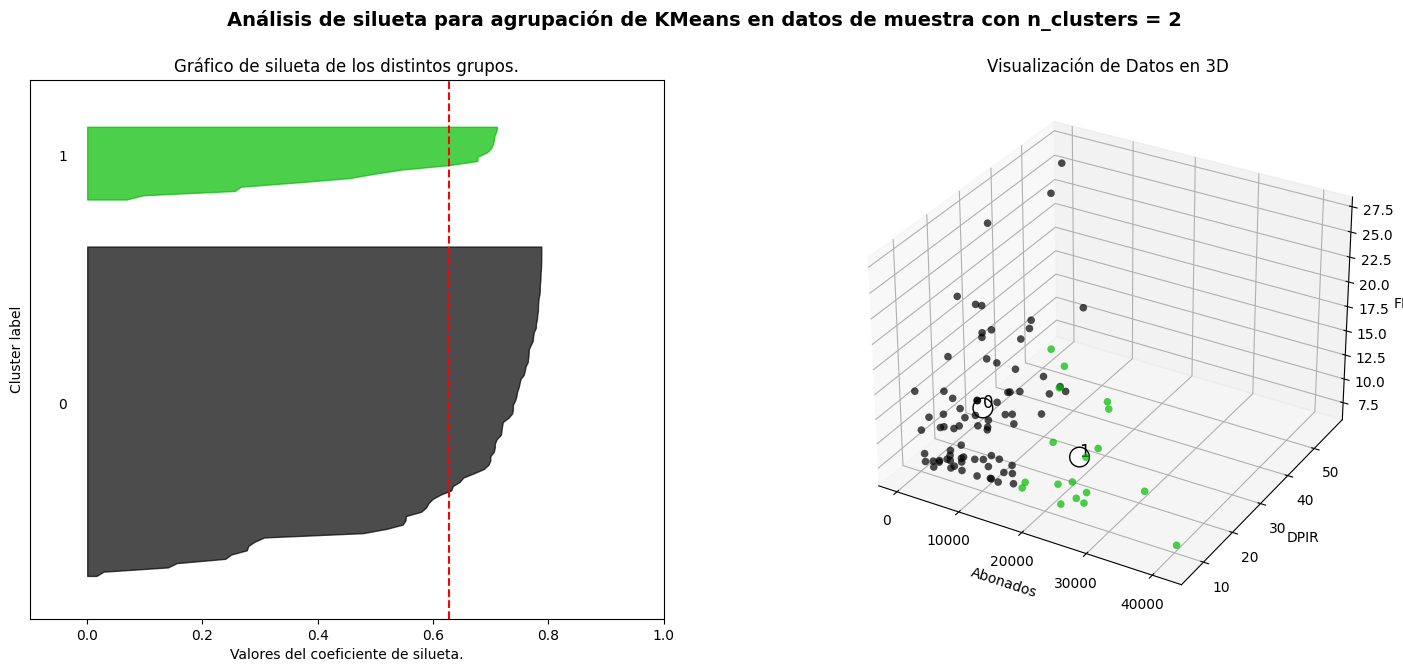

Para n_clusters = 3 El promedio del coeficiente de silueta es : 0.6051637098634107


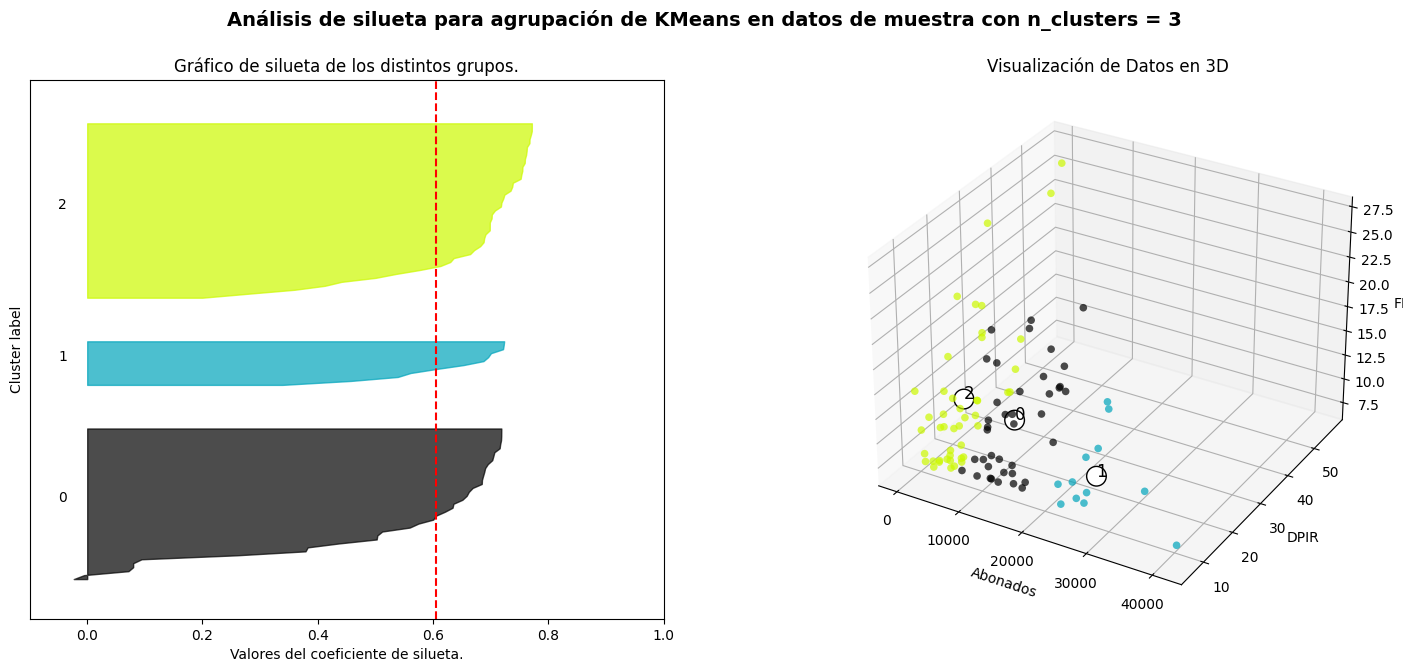

Para n_clusters = 4 El promedio del coeficiente de silueta es : 0.5583039314615962


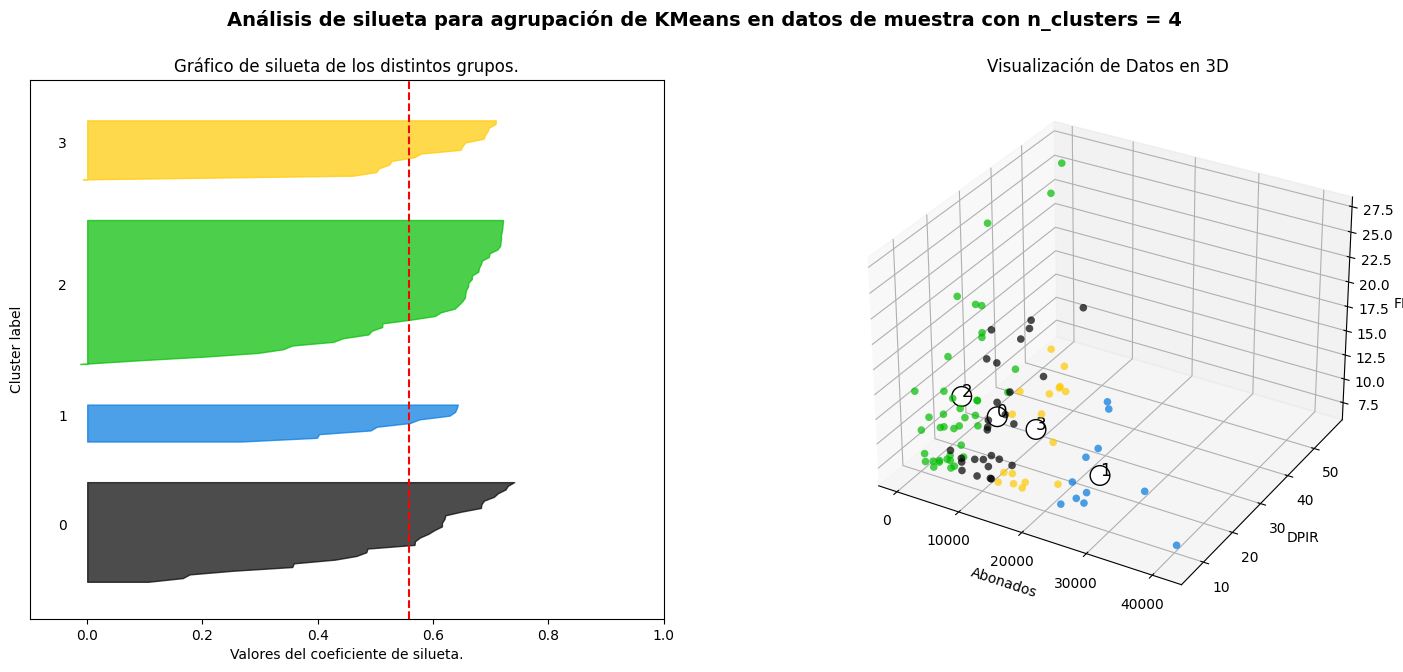

Para n_clusters = 5 El promedio del coeficiente de silueta es : 0.5854487596766899


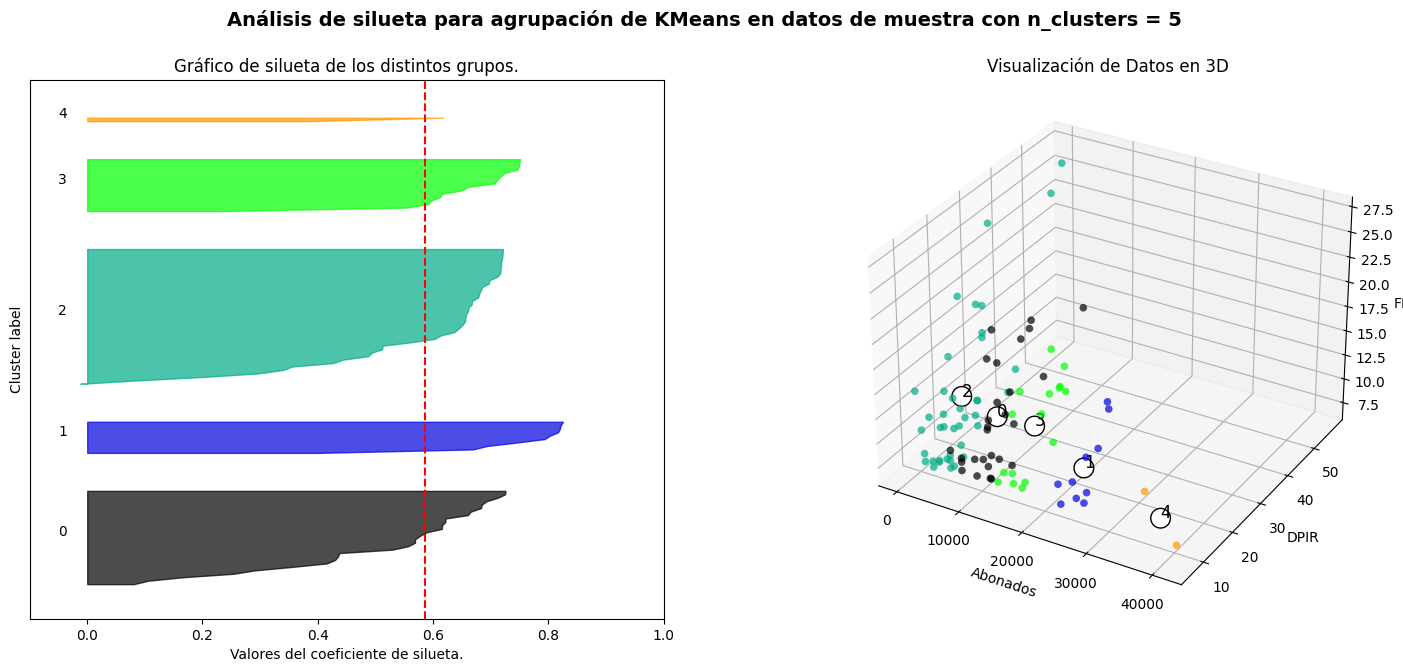

Para n_clusters = 6 El promedio del coeficiente de silueta es : 0.6056317547230486


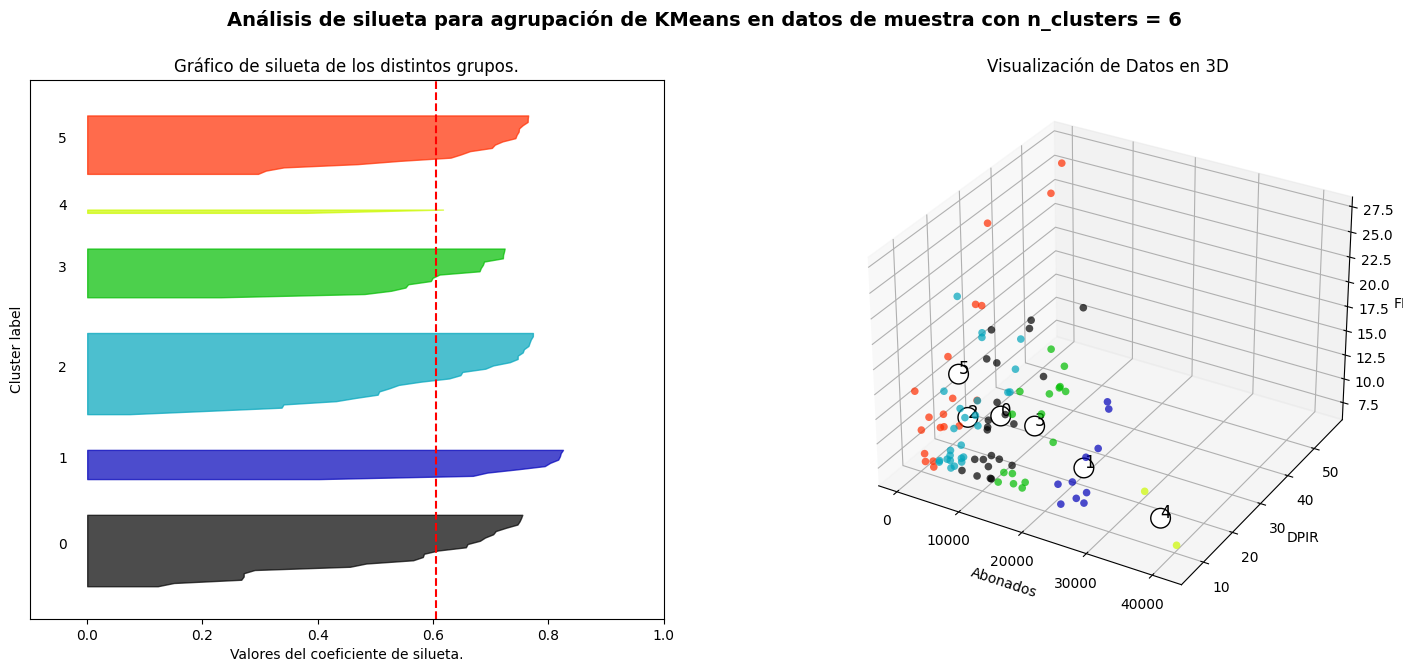

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X = data1.values #Anexo A
#X = data2.values #Anexo B
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Crea un subplot con 1 fila y 2 columnas
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122, projection='3d')
    fig.set_size_inches(18, 7)

    # Primer subplot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "Para n_clusters =",
        n_clusters,
        "El promedio del coeficiente de silueta es :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Gráfico de silueta de los distintos grupos.")
    ax1.set_xlabel("Valores del coeficiente de silueta.")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])

    # 3D Segundo plot
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], X[:, 2],
        c=colors,  # Usa los colores calculados anteriormente
        marker="o", s=30, lw=0, alpha=0.7, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        centers[:, 2],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.text(c[0], c[1], c[2], str(i), fontsize=12)

    ax2.set_title("Visualización de Datos en 3D")
    ax2.set_xlabel("Abonados")
    ax2.set_ylabel("DPIR")
    ax2.set_zlabel("FPI")

    plt.suptitle(
        "Análisis de silueta para agrupación de KMeans en datos de muestra con n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

    plt.show()



### Caso 1. Agrupamiento de Anexo A

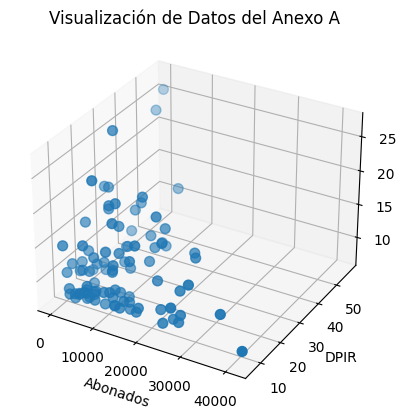

In [ ]:
# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Datos de Abonados, DPIR y una tercera variable (por ejemplo, 'OtraVariable')
ax.scatter(df['Abonados'], df['DPIR'], df['FPI'], s=50)

# Etiquetas de los ejes
ax.set_xlabel('Abonados')
ax.set_ylabel('DPIR')
ax.set_zlabel('FPI')  # Sustituye 'OtraVariable' por la tercera variable que quieras representar

# Título del gráfico
plt.title('Visualización de Datos del Anexo A')

# Mostrar el gráfico
plt.show()

Una vez visualizado los datos, se procede a implementar del algorito de K-means.

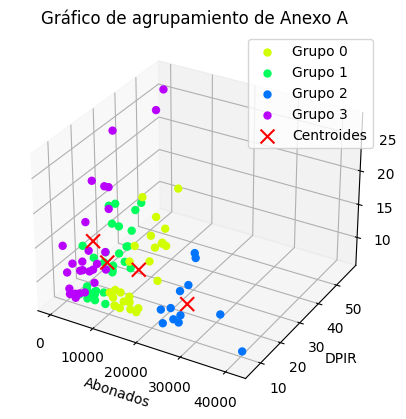

Número de elementos en cada grupo:
Grupo 0: 26
Grupo 1: 31
Grupo 2: 12
Grupo 3: 27


In [ ]:
# Importación de función para calcular asignación de puntos al cluster más cercano
from sklearn.metrics import pairwise_distances_argmin
import seaborn as sns

# Implementación del algoritmo de K-Means
# Recibe como argumentos un dataframe, número K
def find_clusters(df, n_clusters, rseed=2):
    # 1. Elegimos clusters al azar
    rng = np.random.RandomState(rseed)
    i = rng.permutation(df.shape[0])[:n_clusters]
    centers = df.iloc[i].values

    while True:
        # 2a. Asignamos etiquetas basadas en el centro más cercano
        labels = pairwise_distances_argmin(df.values, centers)

        # 2b. Encontramos nuevos centros a partir de las medias de los puntos
        new_centers = np.array([df.values[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. Comprobamos si ha convergido
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels
n_clusters = 4
# Llamada a la función de K-Means
centers, labels = find_clusters(data1, n_clusters)
df['Cluster'] = labels  # Agregar una nueva columna 'Cluster' al DataFrame para las etiquetas de clusters

# Paleta de colores para los clusters
palette = sns.color_palette("hsv", n_clusters)

# Visualización de los resultados de K-Means
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for cluster in range(n_clusters):
    ax.scatter(df[df['Cluster'] == cluster]['Abonados'],
               df[df['Cluster'] == cluster]['DPIR'],
               df[df['Cluster'] == cluster]['FPI'],
               s=25,
               label=f'Grupo {cluster}',
               c=[palette[cluster]],
               alpha=1.0)

# Visualización de los resultados de K-Means

ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2],c='red', alpha=1.0, marker='x', s=100, label='Centroides')  # Marcar los centroides
# Etiquetas de los ejes
ax.set_xlabel('Abonados')
ax.set_ylabel('DPIR')
ax.set_zlabel('FPI')
plt.title('Gráfico de agrupamiento de Anexo A')
plt.legend()
plt.show()

# Este script extra, nos permite conocer la cantidad de elementos que tiene cada grupo.

# Contar el número de elementos en cada grupo
print("Número de elementos en cada grupo:")
for i in range(n_clusters):
    print(f"Grupo {i}: {df[df['Cluster'] == i]['Cluster'].count()}")


### Caso 2. Agrupamiento de Anexo B

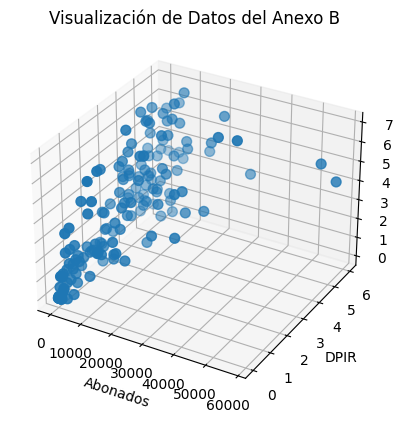

In [ ]:
# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Datos de Abonados, DPIR y una tercera variable (por ejemplo, 'OtraVariable')
ax.scatter(df2['Abonados'], df2['DPIR'], df2['FPI'], s=50)

# Etiquetas de los ejes
ax.set_xlabel('Abonados')
ax.set_ylabel('DPIR')
ax.set_zlabel('FPI')  # Sustituye 'OtraVariable' por la tercera variable que quieras representar

# Título del gráfico
plt.title('Visualización de Datos del Anexo B')

# Mostrar el gráfico
plt.show()

Una vez visualizado los datos, se procede a implementar del algorito de K-means.

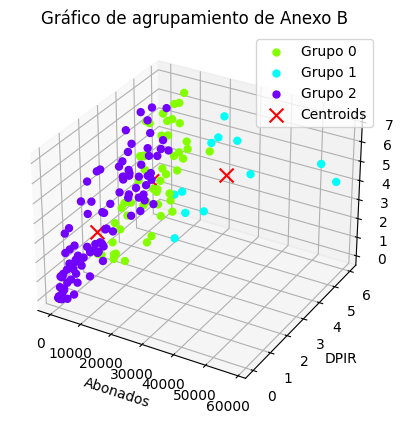

Número de elementos en cada grupo:
Grupo 0: 51
Grupo 1: 12
Grupo 2: 115


In [ ]:
# Importación de función para calcular asignación de puntos al cluster más cercano
from sklearn.metrics import pairwise_distances_argmin
import seaborn as sns

# Implementación del algoritmo de K-Means
# Recibe como argumentos un dataframe, número K
def find_clusters(df, n_clusters, rseed=2):
    # 1. Elegimos clusters al azar
    rng = np.random.RandomState(rseed)
    i = rng.permutation(df.shape[0])[:n_clusters]
    centers = df.iloc[i].values

    while True:
        # 2a. Asignamos etiquetas basadas en el centro más cercano
        labels = pairwise_distances_argmin(df.values, centers)

        # 2b. Encontramos nuevos centros a partir de las medias de los puntos
        new_centers = np.array([df.values[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. Comprobamos si ha convergido
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels
n_clusters=3
# Llamada a la función de K-Means
centers, labels = find_clusters(data2, n_clusters)
df2['Cluster'] = labels  # Agregar una nueva columna 'Cluster' al DataFrame para las etiquetas de clusters

# Paleta de colores para los clusters
palette = sns.color_palette("hsv", n_clusters)

# Visualización de los resultados de K-Means
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for cluster in range(n_clusters):
    ax.scatter(df2[df2['Cluster'] == cluster]['Abonados'],
               df2[df2['Cluster'] == cluster]['DPIR'],
               df2[df2['Cluster'] == cluster]['FPI'],
               s=25,
               label=f'Grupo {cluster}',
               c=[palette[cluster]],
               alpha=1.0)

# Visualización de los resultados de K-Means

ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2],c='red', alpha=1.0, marker='x', s=100, label='Centroids')  # Marcar los centroides
# Etiquetas de los ejes
ax.set_xlabel('Abonados')
ax.set_ylabel('DPIR')
ax.set_zlabel('FPI')
plt.title('Gráfico de agrupamiento de Anexo B')
plt.legend()
plt.show()

# Este script extra, nos permite conocer la cantidad de elementos que tiene cada grupo.

# Contar el número de elementos en cada grupo
print("Número de elementos en cada grupo:")
for i in range(n_clusters):
    print(f"Grupo {i}: {df2[df2['Cluster'] == i]['Cluster'].count()}")

## Paso 4. Implementación del algoritmo K-means para el conjunto de datos **normalizados** del Anexo A y Anexo B.

Primeramente, para *preprocesar* los datos se utiliza la biblioteca Pandas en Python, que permite crear DataFrames a partir de archivos CSV. Entonces, se importa Pandas y se carga el archivo AnexoA.csv en un DataFrame con pd.read_csv().

Asi mismo, se brinda unas estadisticas descriptivas del conjunto de datos.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Cargar los datos desde el archivo CSV
df = pd.read_csv('/home/AnexoA.csv')
df2 = pd.read_csv('/home/AnexoB.csv')

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Normalizar df
df_normalized = df.copy()  # Crear una copia del DataFrame original
df_normalized[['Abonados', 'DPIR', 'FPI']] = scaler.fit_transform(df[['Abonados', 'DPIR', 'FPI']])

# Normalizar df2
df2_normalized = df2.copy()  # Crear una copia del DataFrame original
df2_normalized[['Abonados', 'DPIR', 'FPI']] = scaler.fit_transform(df2[['Abonados', 'DPIR', 'FPI']])

# Mostrar las primeras filas del DataFrame para explorar los datos
print('Para el Anexo A')
print(df_normalized.head())

# Obtener estadísticas descriptivas de los datos
print(df_normalized.describe())
print()
# Mostrar las primeras filas del DataFrame para explorar los datos
print('Para el Anexo B')
print(df2_normalized.head())

# Obtener estadísticas descriptivas de los datos
print(df2_normalized.describe())


Para el Anexo A
  Empresa             Circuito  Abonados      DPIR       FPI
0    CNFL  BRASIL-CIUDAD COLON  0.203697  0.210051  0.639980
1    CNFL      CAJA-INDUSTRIAS  0.052679  0.196702  0.241188
2    CNFL   ELECTRIONA-MONTANA  0.019576  0.187672  0.151561
3    CNFL       BARVA-CIPRESAL  0.088685  0.184923  0.020141
4    CNFL    CORONADO-CASCAJAL  0.233122  0.132116  0.557905
        Abonados       DPIR        FPI
count  96.000000  96.000000  96.000000
mean    0.247289   0.185780   0.231228
std     0.196687   0.179995   0.221895
min     0.000000   0.000000   0.000000
25%     0.105448   0.057519   0.063066
50%     0.202778   0.119258   0.161128
75%     0.338612   0.280379   0.333082
max     1.000000   1.000000   1.000000

Para el Anexo B
  Empresa               Circuito  Abonados      DPIR       FPI
0    ALFA             SECTOR SUR  0.047077  0.582915  0.588235
1    ALFA                   TORO  0.003326  0.217755  0.573888
2    CNFL  DESAMPARADOS-RIO AZUL  0.105767  0.971524  0.49928

Para decidir el número de grupos, se utilizó el **método del codo** y **coeficiente de silueta** que nos permite visualizar de una manera mas fácil, cual es el posible número de grupos.




### Método del codo

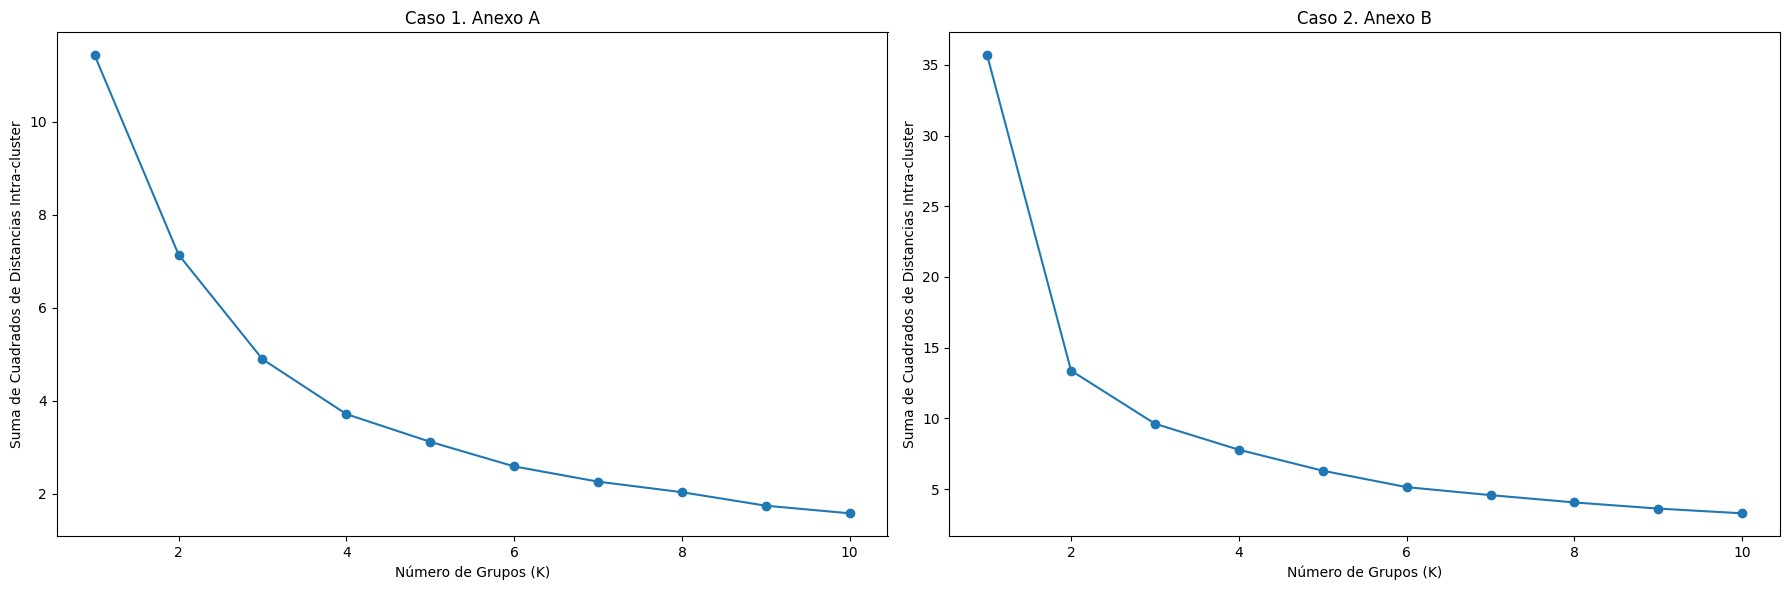

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Crear una lista vacía para almacenar las sumas de cuadrados para los tres diferentes casos
caso1 = []
caso2 = []


# Probar valores de K desde 1 hasta un número máximo
max_k = 10

# Crear una figura con tres subplots en una fila
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Para caso 1. Anexo A
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_normalized[['Abonados', 'DPIR', 'FPI']])
    caso1.append(kmeans.inertia_)

# Graficar el método del codo para caso 1. Abonados-DPIR
axs[0].plot(range(1, max_k + 1), caso1, marker='o')
axs[0].set_xlabel('Número de Grupos (K)')
axs[0].set_ylabel('Suma de Cuadrados de Distancias Intra-cluster')
axs[0].set_title('Caso 1. Anexo A')

# Para caso 2. Anexo B
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df2_normalized[['Abonados', 'DPIR', 'FPI']])
    caso2.append(kmeans.inertia_)

# Graficar el método del codo para caso 2. Abonados-FPI
axs[1].plot(range(1, max_k + 1), caso2, marker='o')
axs[1].set_xlabel('Número de Grupos (K)')
axs[1].set_ylabel('Suma de Cuadrados de Distancias Intra-cluster')
axs[1].set_title('Caso 2. Anexo B')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura con los tres subplots
plt.show()

#Código para ocultar los warnings
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

### Método de coeficiente de silueta

For 2 clusters, Silhouette Score is 0.3962071080186682
For 3 clusters, Silhouette Score is 0.4028535808018128
For 4 clusters, Silhouette Score is 0.4017460737028782
For 5 clusters, Silhouette Score is 0.366463539021495
For 6 clusters, Silhouette Score is 0.3304942713454628
For 7 clusters, Silhouette Score is 0.3368281652774497
For 8 clusters, Silhouette Score is 0.3178616848832279
For 9 clusters, Silhouette Score is 0.3298478633236954
For 10 clusters, Silhouette Score is 0.32867595987136583

For 2 clusters, Silhouette Score is 0.5290523138062347
For 3 clusters, Silhouette Score is 0.4277585867250753
For 4 clusters, Silhouette Score is 0.3900071177053771
For 5 clusters, Silhouette Score is 0.40279011184017127
For 6 clusters, Silhouette Score is 0.402875622389313
For 7 clusters, Silhouette Score is 0.3990236882394611
For 8 clusters, Silhouette Score is 0.38607261499554735
For 9 clusters, Silhouette Score is 0.404667485611166
For 10 clusters, Silhouette Score is 0.3942674716998388



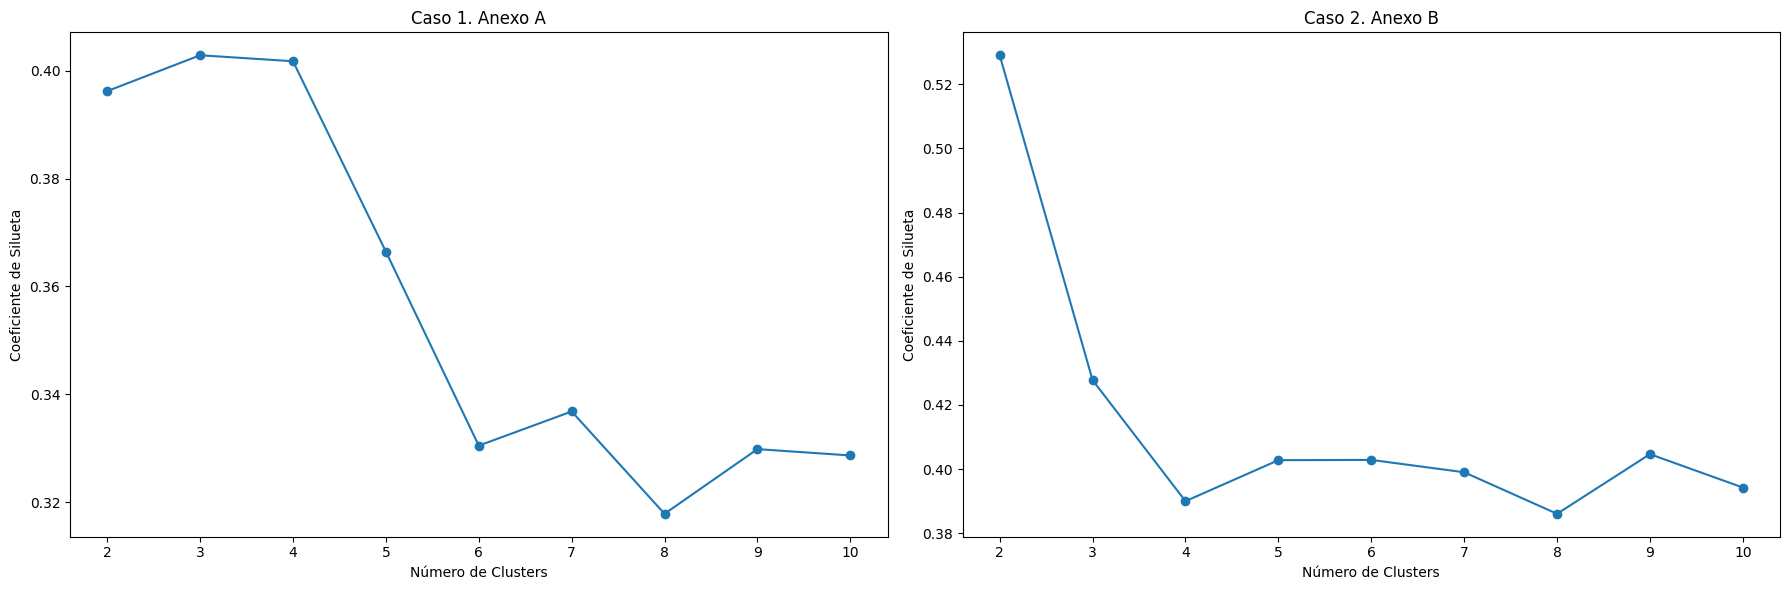

In [ ]:
from sklearn.metrics import silhouette_score

# Crear una figura con tres subplots en una fila
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Seleccionar las columnas
data1 = df_normalized[['Abonados', 'DPIR','FPI']]
data2 = df2_normalized[['Abonados', 'DPIR','FPI']]


silhouette_scores1 = []
silhouette_scores2 = []

# Para Caso Anexo A. Calcular el coeficiente de silueta para diferentes números de clusters
for n_clusters in range(2, 11):  # Prueba con 2 a 10 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(data1)
    silhouette_avg = silhouette_score(data1, labels, metric='euclidean')
    silhouette_scores1.append(silhouette_avg)
    print(f"For {n_clusters} clusters, Silhouette Score is {silhouette_avg}")

print()
# Graficar el número de clusters vs. Coeficiente de Silueta
axs[0].plot(range(2, 11), silhouette_scores1, marker='o', linestyle='-')
axs[0].set_xlabel("Número de Clusters")
axs[0].set_ylabel("Coeficiente de Silueta")
axs[0].set_title("Caso 1. Anexo A")

# Para Caso Anexo B. Calcular el coeficiente de silueta para diferentes números de clusters
for n_clusters in range(2, 11):  # Prueba con 2 a 10 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(data2)
    silhouette_avg = silhouette_score(data2, labels, metric='euclidean')
    silhouette_scores2.append(silhouette_avg)
    print(f"For {n_clusters} clusters, Silhouette Score is {silhouette_avg}")
print()

# Graficar el número de clusters vs. Coeficiente de Silueta
axs[1].plot(range(2, 11), silhouette_scores2, marker='o', linestyle='-')
axs[1].set_xlabel("Número de Clusters")
axs[1].set_ylabel("Coeficiente de Silueta")
axs[1].set_title("Caso 2. Anexo B")

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura con los tres subplots
plt.show()

#Código para ocultar los warnings
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

### Visualizador del coeficiente de silueta para Anexo A

Para n_clusters = 2 El promedio del coeficiente de silueta es : 0.41415063777471145


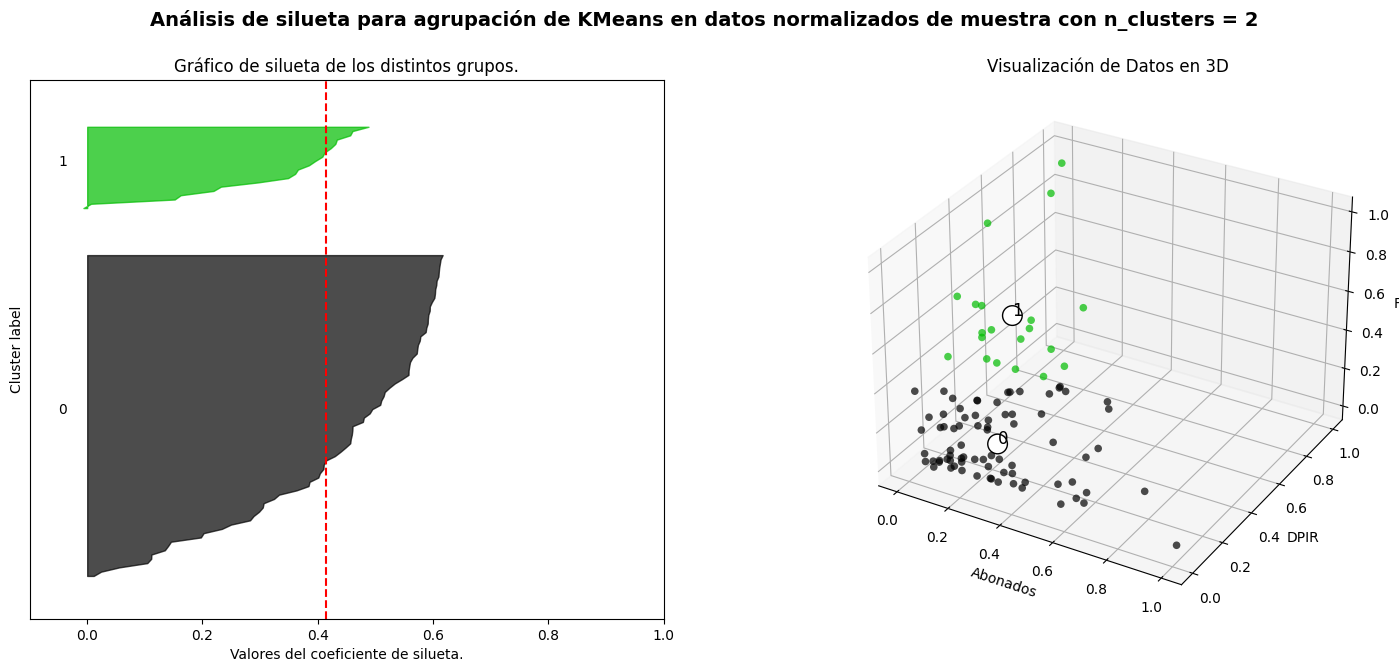

Para n_clusters = 3 El promedio del coeficiente de silueta es : 0.2541456510387978


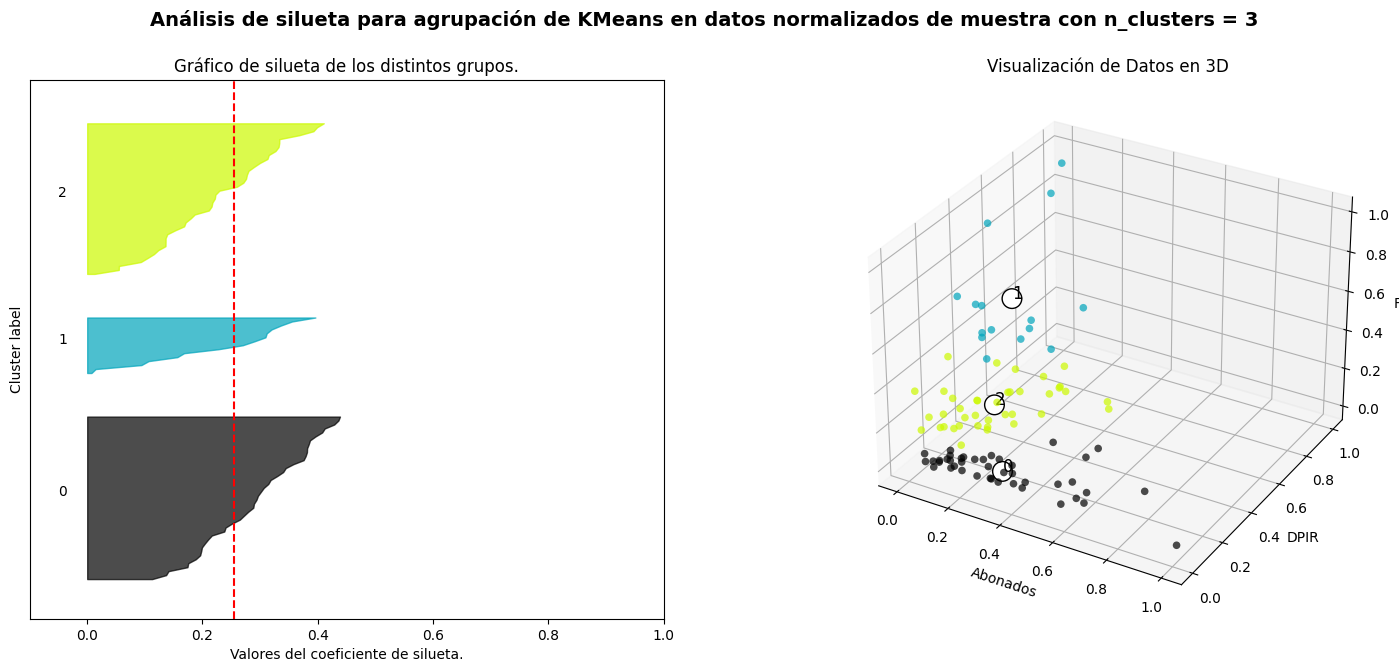

Para n_clusters = 4 El promedio del coeficiente de silueta es : 0.3154850493909875


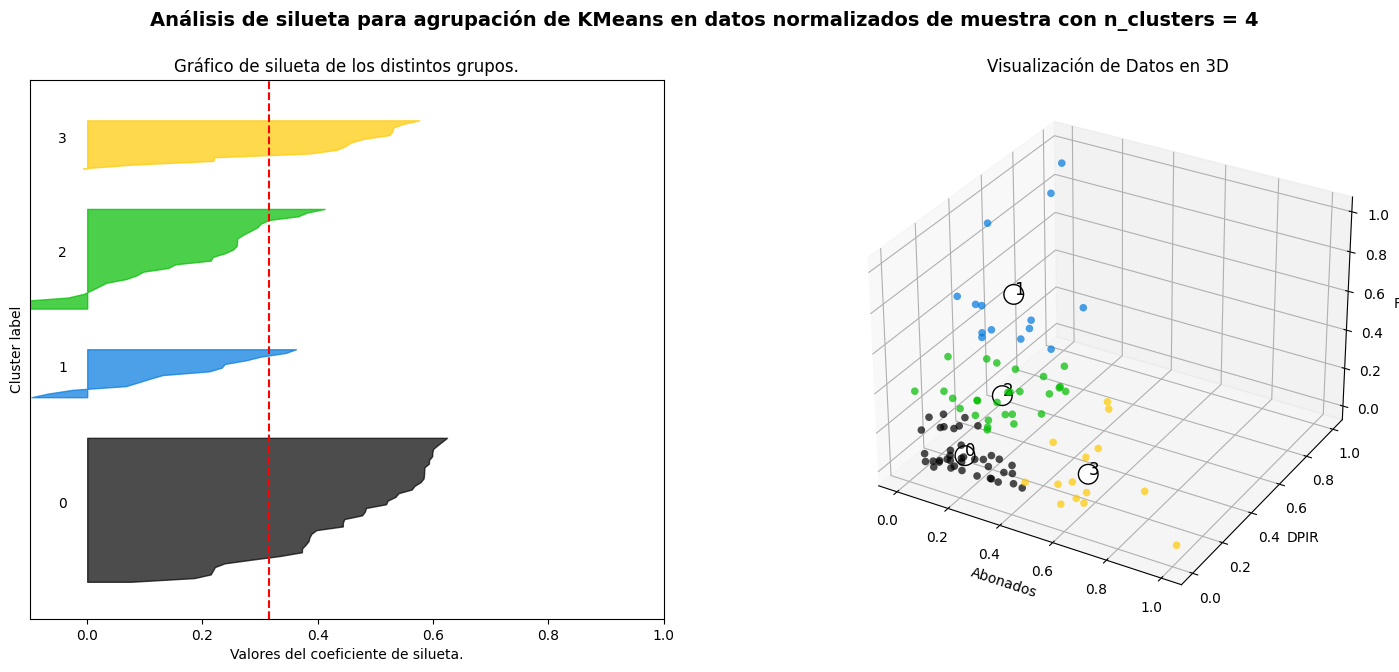

Para n_clusters = 5 El promedio del coeficiente de silueta es : 0.2621826061683658


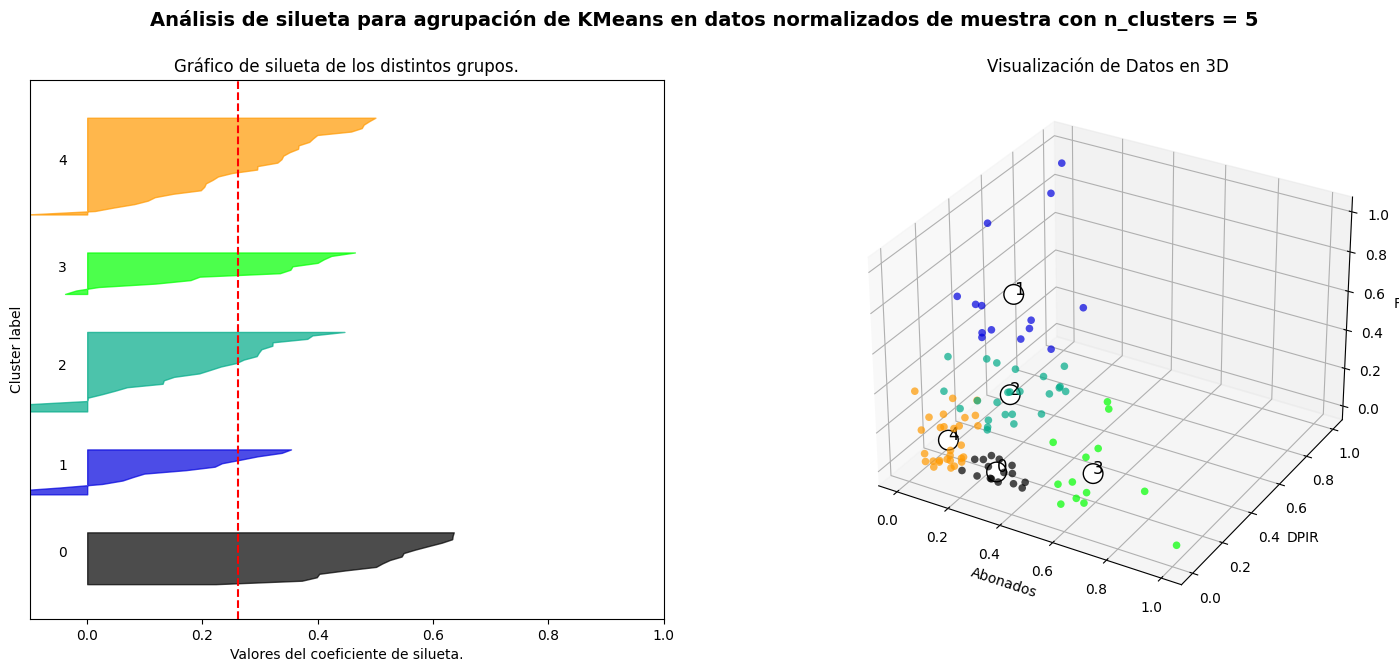

Para n_clusters = 6 El promedio del coeficiente de silueta es : 0.2834458888747125


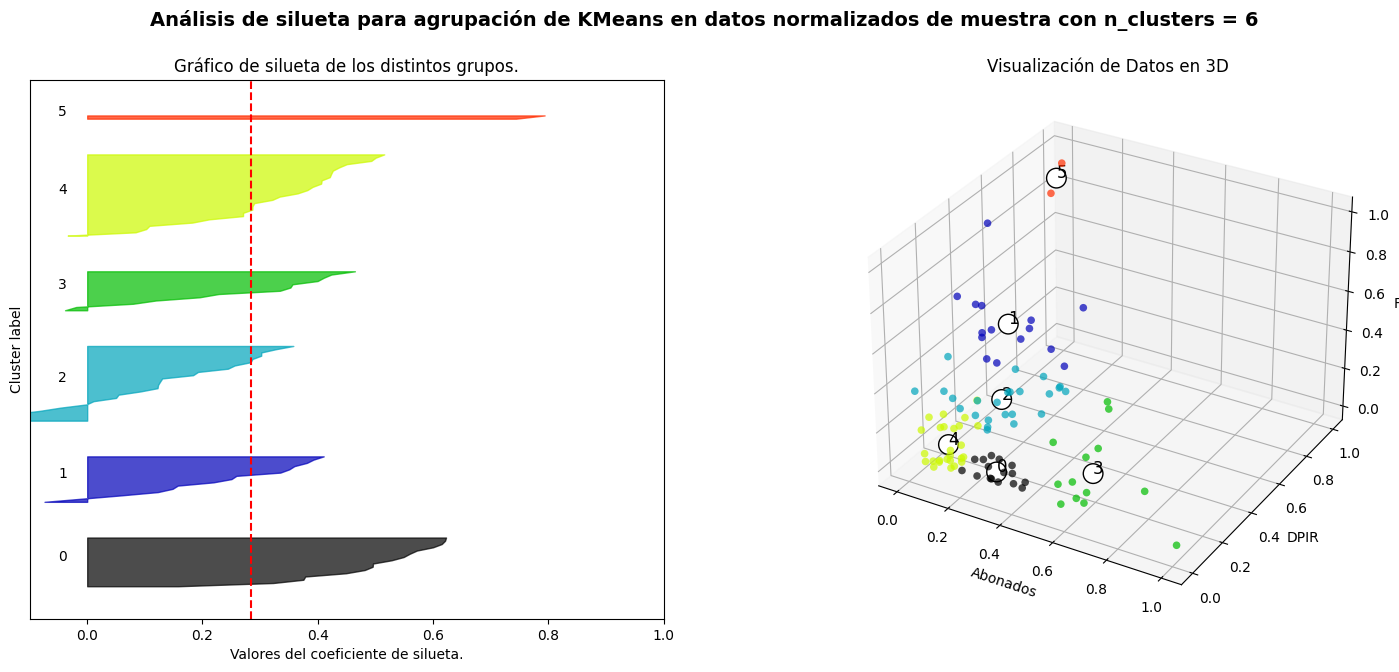

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X = data1.values
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Crea un subplot con 1 fila y 2 columnas
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122, projection='3d')
    fig.set_size_inches(18, 7)

    # El primer subplot es la "silhouette plot"
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "Para n_clusters =",
        n_clusters,
        "El promedio del coeficiente de silueta es :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Gráfico de silueta de los distintos grupos.")
    ax1.set_xlabel("Valores del coeficiente de silueta.")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])

    # 3D scatter plot
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], X[:, 2],
        c=colors,  # Usa los colores calculados anteriormente
        marker="o", s=30, lw=0, alpha=0.7, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        centers[:, 2],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.text(c[0], c[1], c[2], str(i), fontsize=12)

    ax2.set_title("Visualización de Datos en 3D")
    ax2.set_xlabel("Abonados")
    ax2.set_ylabel("DPIR")
    ax2.set_zlabel("FPI")

    plt.suptitle(
        "Análisis de silueta para agrupación de KMeans en datos normalizados de muestra con n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

    plt.show()



### Visualizador del coeficiente de silueta para Anexo B

Para n_clusters = 2 El promedio del coeficiente de silueta es : 0.5290523138062347


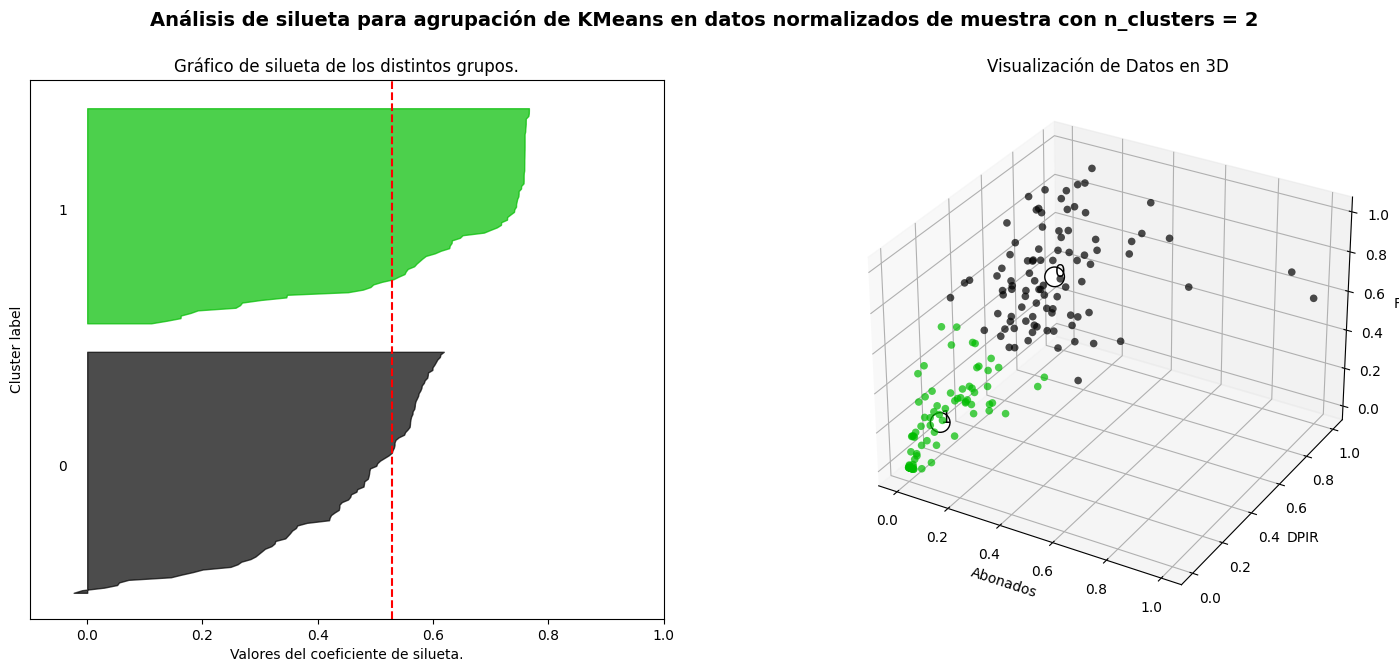

Para n_clusters = 3 El promedio del coeficiente de silueta es : 0.42598738633145616


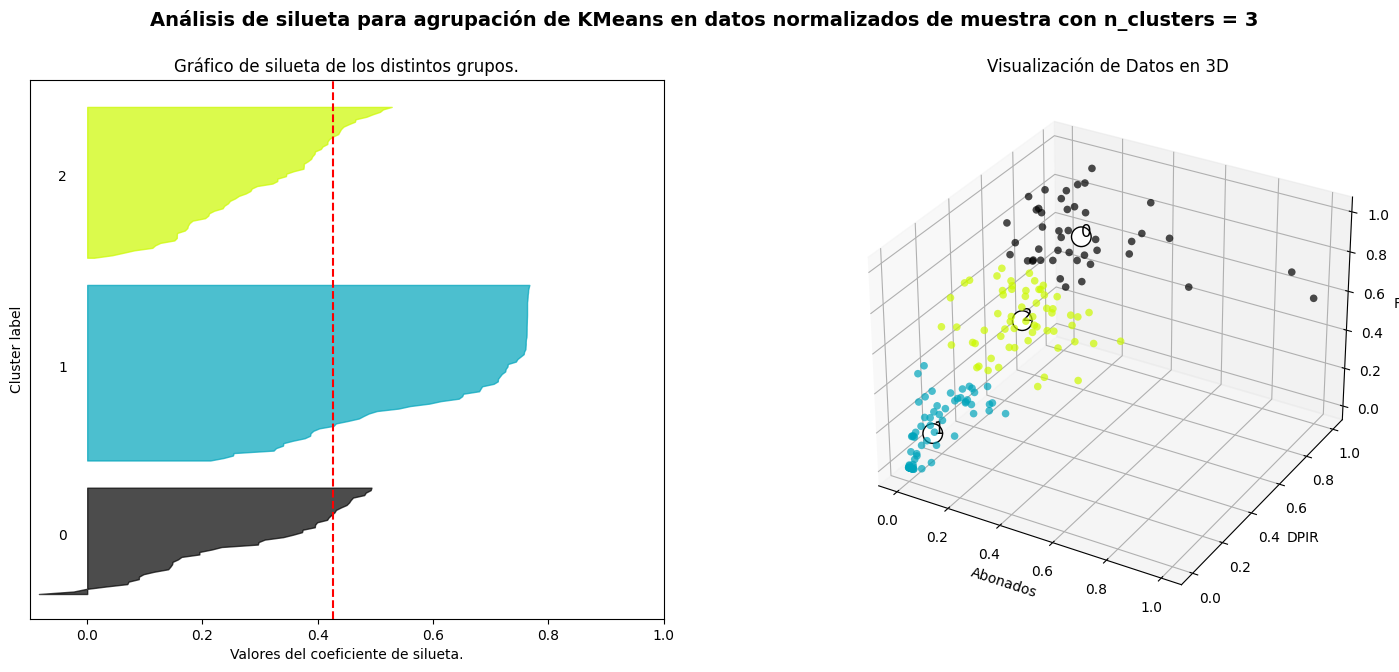

Para n_clusters = 4 El promedio del coeficiente de silueta es : 0.39044399993037016


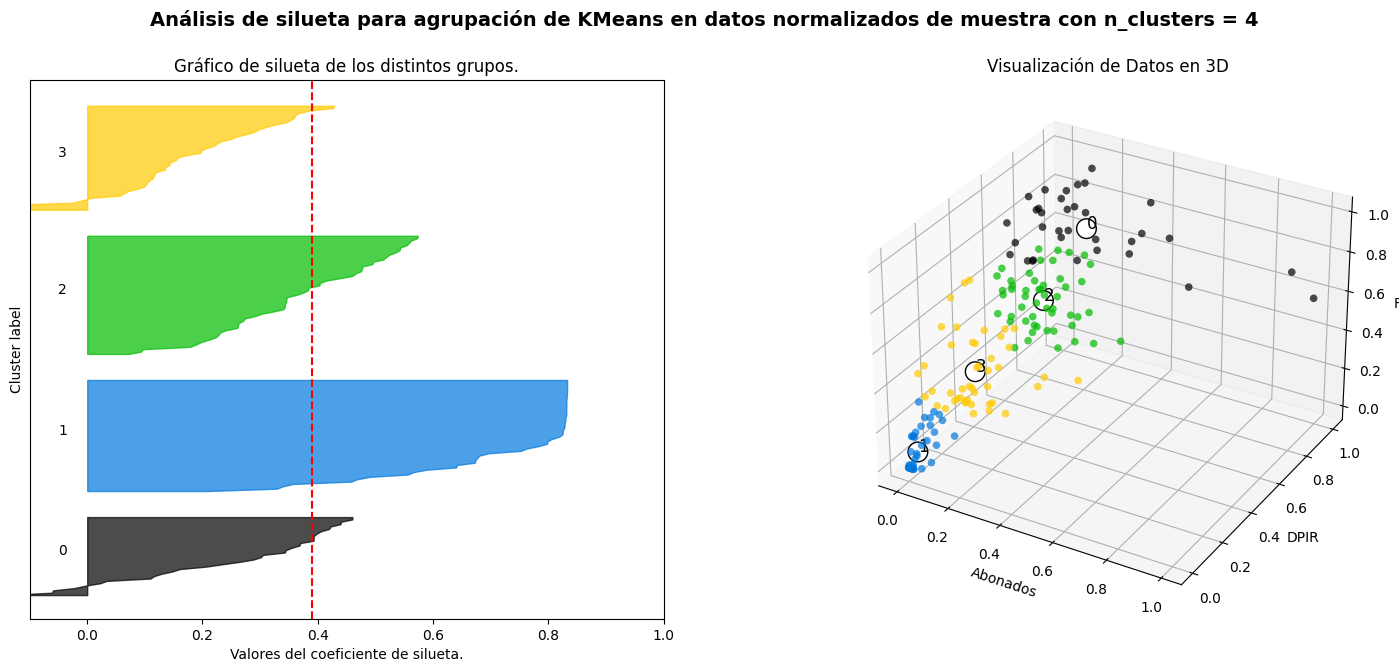

Para n_clusters = 5 El promedio del coeficiente de silueta es : 0.39267143331433324


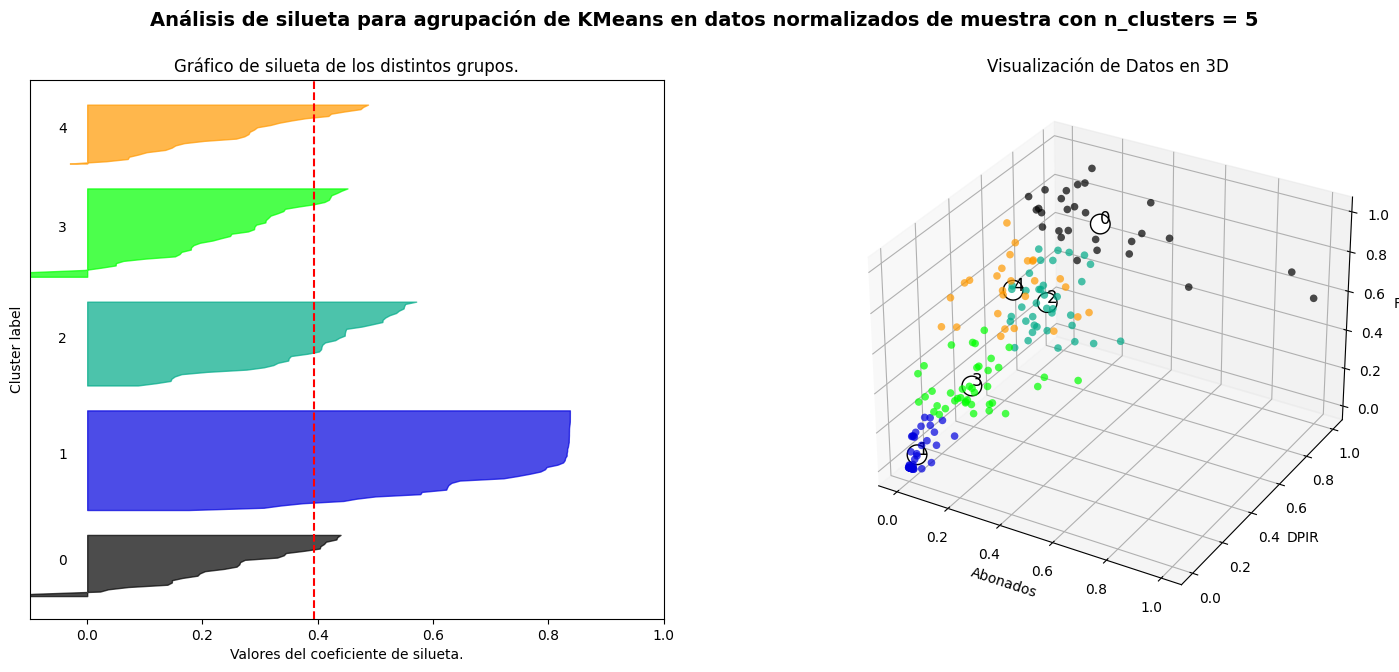

Para n_clusters = 6 El promedio del coeficiente de silueta es : 0.40225176580512734


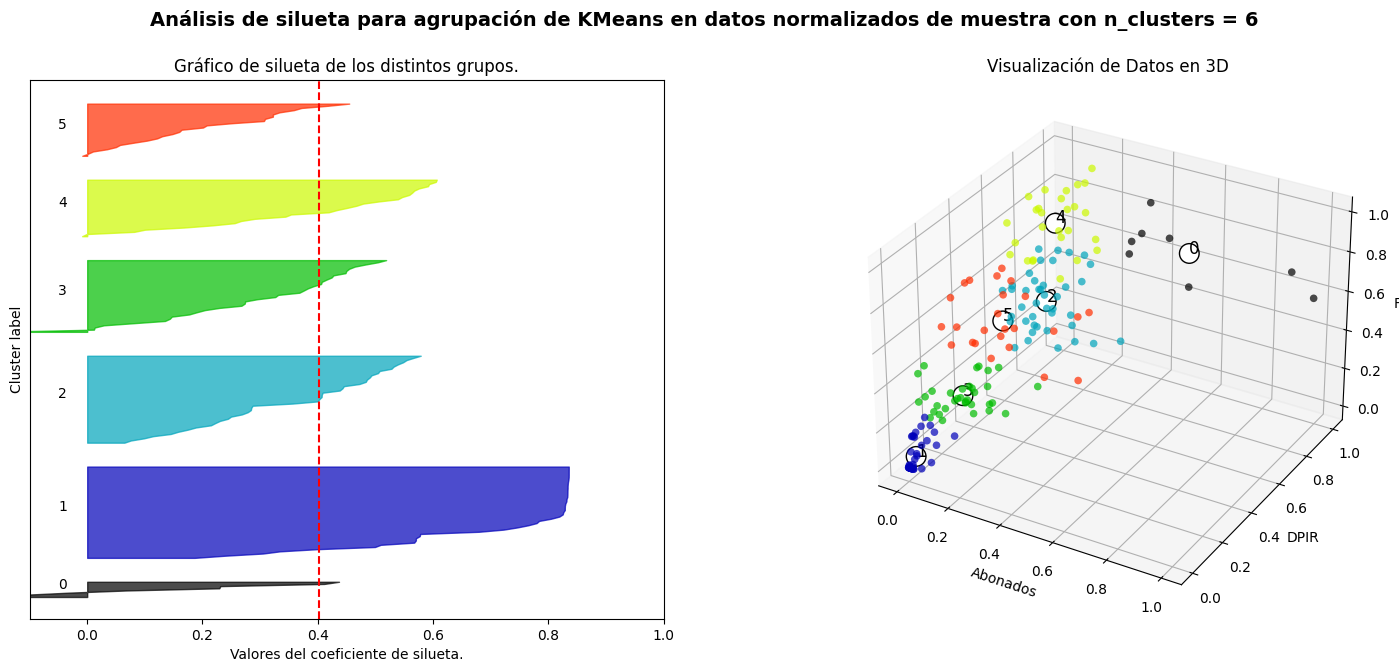

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


X = data2.values
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122, projection='3d')
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "Para n_clusters =",
        n_clusters,
        "El promedio del coeficiente de silueta es :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Gráfico de silueta de los distintos grupos.")
    ax1.set_xlabel("Valores del coeficiente de silueta.")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])

    # 3D scatter plot
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], X[:, 2],
        c=colors,  # Usa los colores calculados anteriormente
        marker="o", s=30, lw=0, alpha=0.7, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        centers[:, 2],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.text(c[0], c[1], c[2], str(i), fontsize=12)

    ax2.set_title("Visualización de Datos en 3D")
    ax2.set_xlabel("Abonados")
    ax2.set_ylabel("DPIR")
    ax2.set_zlabel("FPI")

    plt.suptitle(
        "Análisis de silueta para agrupación de KMeans en datos normalizados de muestra con n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

    plt.show()



### Caso 1. Agrupamiento de Anexo A

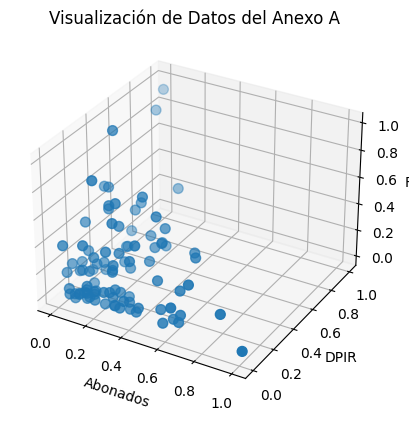

In [ ]:
# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Datos de Abonados, DPIR y una tercera variable (por ejemplo, 'OtraVariable')
ax.scatter(df_normalized['Abonados'], df_normalized['DPIR'], df_normalized['FPI'], s=50)

# Etiquetas de los ejes
ax.set_xlabel('Abonados')
ax.set_ylabel('DPIR')
ax.set_zlabel('FPI')  # Sustituye 'OtraVariable' por la tercera variable que quieras representar

# Título del gráfico
plt.title('Visualización de Datos del Anexo A')

# Mostrar el gráfico
plt.show()

Una vez visualizado los datos, se procede a implementar del algorito de K-means.

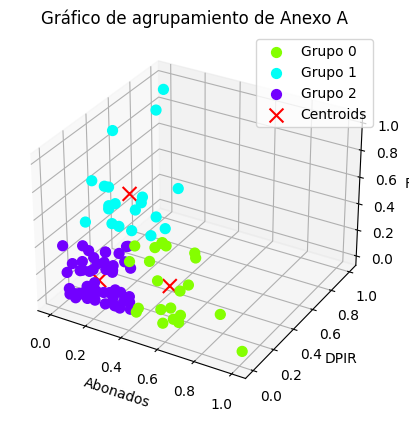

Número de elementos en cada grupo:
Grupo 0: 22
Grupo 1: 20
Grupo 2: 54


In [ ]:
# Importación de función para calcular asignación de puntos al cluster más cercano
from sklearn.metrics import pairwise_distances_argmin
import seaborn as sns

# Implementación del algoritmo de K-Means
# Recibe como argumentos un dataframe, número K
def find_clusters(df, n_clusters, rseed=2):
    # 1. Elegimos clusters al azar
    rng = np.random.RandomState(rseed)
    i = rng.permutation(df.shape[0])[:n_clusters]
    centers = df.iloc[i].values

    while True:
        # 2a. Asignamos etiquetas basadas en el centro más cercano
        labels = pairwise_distances_argmin(df.values, centers)

        # 2b. Encontramos nuevos centros a partir de las medias de los puntos
        new_centers = np.array([df.values[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. Comprobamos si ha convergido
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels
n_clusters = 3
# Llamada a la función de K-Means
centers, labels = find_clusters(data1, n_clusters)
df_normalized['Cluster'] = labels  # Agregar una nueva columna 'Cluster' al DataFrame para las etiquetas de clusters

# Paleta de colores para los clusters
palette = sns.color_palette("hsv", n_clusters)

# Visualización de los resultados de K-Means
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for cluster in range(n_clusters):
    ax.scatter(df_normalized[df_normalized['Cluster'] == cluster]['Abonados'],
               df_normalized[df_normalized['Cluster'] == cluster]['DPIR'],
               df_normalized[df_normalized['Cluster'] == cluster]['FPI'],
               s=50,
               label=f'Grupo {cluster}',
               c=[palette[cluster]],
               alpha=1.0)

# Visualización de los resultados de K-Means

ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2],c='red', alpha=1.0, marker='x', s=100, label='Centroids')  # Marcar los centroides
# Etiquetas de los ejes
ax.set_xlabel('Abonados')
ax.set_ylabel('DPIR')
ax.set_zlabel('FPI')
plt.title('Gráfico de agrupamiento de Anexo A')
plt.legend()
plt.show()

# Este script extra, nos permite conocer la cantidad de elementos que tiene cada grupo.

# Contar el número de elementos en cada grupo
print("Número de elementos en cada grupo:")
for i in range(n_clusters):
    print(f"Grupo {i}: {df_normalized[df_normalized['Cluster'] == i]['Cluster'].count()}")

### Caso 2. Agrupamiento de Anexo B

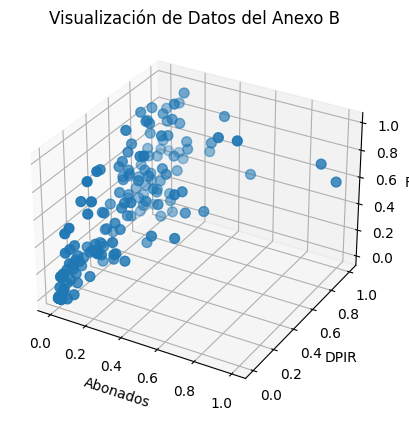

In [ ]:
# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Datos de Abonados, DPIR y una tercera variable (por ejemplo, 'OtraVariable')
ax.scatter(df2_normalized['Abonados'], df2_normalized['DPIR'], df2_normalized['FPI'], s=50)

# Etiquetas de los ejes
ax.set_xlabel('Abonados')
ax.set_ylabel('DPIR')
ax.set_zlabel('FPI')  # Sustituye 'OtraVariable' por la tercera variable que quieras representar

# Título del gráfico
plt.title('Visualización de Datos del Anexo B')

# Mostrar el gráfico
plt.show()

Una vez visualizado los datos, se procede a implementar del algorito de K-means.

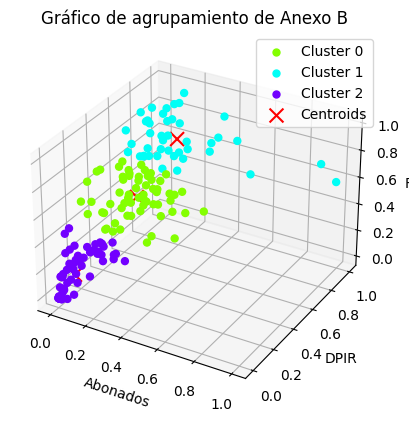

Número de elementos en cada grupo:
Grupo 0: 63
Grupo 1: 43
Grupo 2: 72


In [ ]:
# Importación de función para calcular asignación de puntos al cluster más cercano
from sklearn.metrics import pairwise_distances_argmin
import seaborn as sns

# Implementación del algoritmo de K-Means
# Recibe como argumentos un dataframe, número K
def find_clusters(df, n_clusters, rseed=2):
    # 1. Elegimos clusters al azar
    rng = np.random.RandomState(rseed)
    i = rng.permutation(df.shape[0])[:n_clusters]
    centers = df.iloc[i].values

    while True:
        # 2a. Asignamos etiquetas basadas en el centro más cercano
        labels = pairwise_distances_argmin(df.values, centers)

        # 2b. Encontramos nuevos centros a partir de las medias de los puntos
        new_centers = np.array([df.values[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. Comprobamos si ha convergido
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels
n_clusters=3
# Llamada a la función de K-Means
centers, labels = find_clusters(data2, n_clusters)
df2_normalized['Cluster'] = labels  # Agregar una nueva columna 'Cluster' al DataFrame para las etiquetas de clusters

# Paleta de colores para los clusters
palette = sns.color_palette("hsv", n_clusters)

# Visualización de los resultados de K-Means
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for cluster in range(n_clusters):
    ax.scatter(df2_normalized[df2_normalized['Cluster'] == cluster]['Abonados'],
               df2_normalized[df2_normalized['Cluster'] == cluster]['DPIR'],
               df2_normalized[df2_normalized['Cluster'] == cluster]['FPI'],
               s=25,
               label=f'Cluster {cluster}',
               c=[palette[cluster]],
               alpha=1.0)

# Visualización de los resultados de K-Means

ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2],c='red', alpha=1.0, marker='x', s=100, label='Centroids')  # Marcar los centroides
# Etiquetas de los ejes
ax.set_xlabel('Abonados')
ax.set_ylabel('DPIR')
ax.set_zlabel('FPI')
plt.title('Gráfico de agrupamiento de Anexo B')
plt.legend()
plt.show()

# Este script extra, nos permite conocer la cantidad de elementos que tiene cada grupo.

# Contar el número de elementos en cada grupo
print("Número de elementos en cada grupo:")
for i in range(n_clusters):
    print(f"Grupo {i}: {df2_normalized[df2_normalized['Cluster'] == i]['Cluster'].count()}")

## Paso 5. Implementación del algoritmo Mini Batch K-means para el conjunto de datos del Anexo A y Anexo B.

Primeramente, para *preprocesar* los datos se utiliza la biblioteca Pandas en Python, que permite crear DataFrames a partir de archivos CSV. Entonces, se importa Pandas y se carga el archivo AnexoA.csv en un DataFrame con pd.read_csv().

Asi mismo, se brinda unas estadisticas descriptivas del conjunto de datos.

In [ ]:
import pandas as pd

# Cargar los datos desde el archivo CSV
df = pd.read_csv('/home/AnexoA.csv')
df2 = pd.read_csv('/home/AnexoB.csv')

Se sabe que para el Anexo A se tiene un K=4 y Anexo B se tiene un K=3. Por lo tanto, se procede a implementar del algorito de Mini Batch K-means.

### Caso 1. Agrupamiento de Anexo A

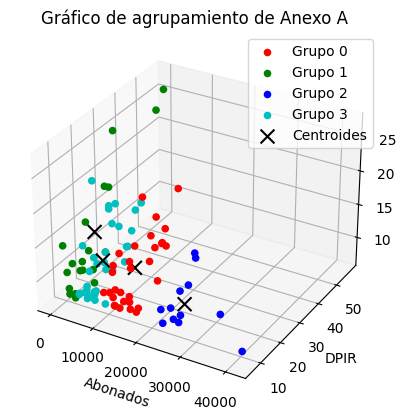

Número de elementos en cada grupo:
Grupo 3: 33
Grupo 1: 20
Grupo 0: 31
Grupo 2: 12


In [ ]:
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Importar Pandas
from sklearn.cluster import MiniBatchKMeans
from mpl_toolkits.mplot3d import Axes3D  # Para visualizar en 3D

# Cargar el DataFrame desde un archivo o fuente de datos (reemplaza 'archivo.csv' con tu fuente de datos real)
df = pd.read_csv('/home/AnexoA.csv')  # Cambia 'archivo.csv' por el nombre de tu archivo

# Extraer los datos de las columnas 'Abonados', 'DPIR' y 'FPI'
data = df[['Abonados', 'DPIR', 'FPI']].values

# Realizar Mini Batch K-Means con K=4
n_clusters = 4  # Número de clústeres
batch_size = 45
mbk = MiniBatchKMeans(n_clusters=n_clusters, batch_size=batch_size, n_init=10, max_no_improvement=10, verbose=0)
mbk.fit(data)

# Obtener las etiquetas de clústeres
labels = mbk.labels_

# Visualizar el agrupamiento en tres dimensiones
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Definir colores para los clústeres
colors = ['r', 'g', 'b', 'c']

# Plotear puntos de cada clúster con un color sólido
for i in range(n_clusters):
    ax.scatter(data[labels == i, 0], data[labels == i, 1], data[labels == i, 2], c=colors[i], label=f'Grupo {i}', alpha=1)

# Marcar los centroides con una "X"
centroids = mbk.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='k', marker='x', s=100, label='Centroides',alpha=1)

ax.set_xlabel('Abonados')
ax.set_ylabel('DPIR')
ax.set_zlabel('FPI')
plt.legend()
plt.title('Gráfico de agrupamiento de Anexo A')
plt.show()

from collections import Counter

# Obtener las etiquetas de clústeres
labels = mbk.labels_

# Contar cuántos datos hay en cada clúster
cluster_counts = Counter(labels)

# Imprimir el número de datos en cada clúster
print("Número de elementos en cada grupo:")
for cluster, count in cluster_counts.items():
    print(f'Grupo {cluster}: {count}')

### Caso 2. Agrupamiento de Anexo B

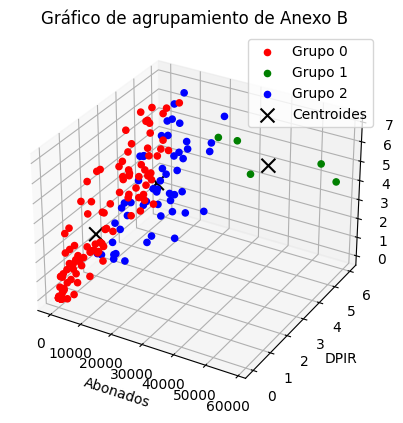

Número de elementos en cada grupo:
Grupo 0: 120 datos
Grupo 2: 53 datos
Grupo 1: 5 datos


In [ ]:
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Importar Pandas
from sklearn.cluster import MiniBatchKMeans
from mpl_toolkits.mplot3d import Axes3D  # Para visualizar en 3D

# Cargar el DataFrame desde un archivo o fuente de datos (reemplaza 'archivo.csv' con tu fuente de datos real)
df = pd.read_csv('/home/AnexoB.csv')  # Cambia 'archivo.csv' por el nombre de tu archivo

# Extraer los datos de las columnas 'Abonados', 'DPIR' y 'FPI'
data = df[['Abonados', 'DPIR', 'FPI']].values

# Realizar Mini Batch K-Means
n_clusters = 3  # Número de clústeres deseado
batch_size = 45
mbk = MiniBatchKMeans(n_clusters=n_clusters, batch_size=batch_size, n_init=10, max_no_improvement=10, verbose=0)
mbk.fit(data)

# Obtener las etiquetas de clústeres
labels = mbk.labels_

# Visualizar el agrupamiento en tres dimensiones
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Definir colores para los clústeres
colors = ['r', 'g', 'b']

# Plotear puntos de cada clúster con un color sólido
for i in range(n_clusters):
    ax.scatter(data[labels == i, 0], data[labels == i, 1], data[labels == i, 2], c=colors[i], label=f'Grupo {i}', alpha=1)

# Marcar los centroides con una "X"
centroids = mbk.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='k', marker='x', s=100, label='Centroides', alpha=1)

ax.set_xlabel('Abonados')
ax.set_ylabel('DPIR')
ax.set_zlabel('FPI')

plt.title('Gráfico de agrupamiento de Anexo B')
plt.legend()
plt.show()

from collections import Counter

# Realizar Mini Batch K-Means con K=4 (código previo)

# Obtener las etiquetas de clústeres
labels = mbk.labels_

# Contar cuántos datos hay en cada clúster
cluster_counts = Counter(labels)

# Imprimir el número de datos en cada clúster
print("Número de elementos en cada grupo:")
for cluster, count in cluster_counts.items():
    print(f'Grupo {cluster}: {count} datos')


## Paso 6. Implementación del algoritmo Mini Batch K-means para el conjunto de datos **normalizados** del Anexo A y Anexo B.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Cargar los datos desde el archivo CSV
df = pd.read_csv('/home/AnexoA.csv')
df2 = pd.read_csv('/home/AnexoB.csv')

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Normalizar df
df_normalized = df.copy()  # Crear una copia del DataFrame original
df_normalized[['Abonados', 'DPIR', 'FPI']] = scaler.fit_transform(df[['Abonados', 'DPIR', 'FPI']])

# Normalizar df2
df2_normalized = df2.copy()  # Crear una copia del DataFrame original
df2_normalized[['Abonados', 'DPIR', 'FPI']] = scaler.fit_transform(df2[['Abonados', 'DPIR', 'FPI']])

### Caso 1. Agrupamiento de Anexo A

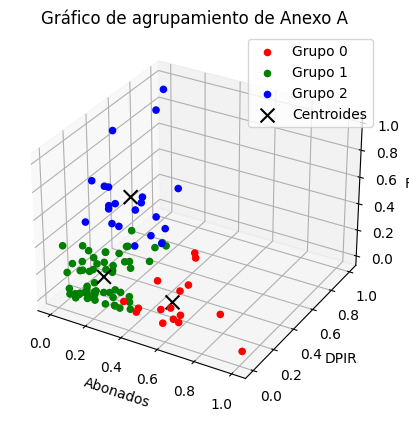

Número de elementos en cada grupo:
Grupo 2: 21
Grupo 1: 59
Grupo 0: 16


In [ ]:
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Importar Pandas
from sklearn.cluster import MiniBatchKMeans
from mpl_toolkits.mplot3d import Axes3D  # Para visualizar en 3D

# Extraer los datos de las columnas 'Abonados', 'DPIR' y 'FPI'
data = df_normalized[['Abonados', 'DPIR', 'FPI']].values

# Realizar Mini Batch K-Means con K=3
n_clusters = 3  # Número de clústeres
batch_size = 45
mbk = MiniBatchKMeans(n_clusters=n_clusters, batch_size=batch_size, n_init=10, max_no_improvement=10, verbose=0)
mbk.fit(data)

# Obtener las etiquetas de clústeres
labels = mbk.labels_

# Visualizar el agrupamiento en tres dimensiones
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Definir colores para los clústeres
colors = ['r', 'g', 'b']

# Plotear puntos de cada clúster con un color sólido
for i in range(n_clusters):
    ax.scatter(data[labels == i, 0], data[labels == i, 1], data[labels == i, 2], c=colors[i], label=f'Grupo {i}', alpha=1)

# Marcar los centroides con una "X"
centroids = mbk.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='k', marker='x', s=100, label='Centroides',alpha=1)

ax.set_xlabel('Abonados')
ax.set_ylabel('DPIR')
ax.set_zlabel('FPI')
plt.legend()
plt.title('Gráfico de agrupamiento de Anexo A')
plt.show()

from collections import Counter

# Obtener las etiquetas de clústeres
labels = mbk.labels_

# Contar cuántos datos hay en cada clúster
cluster_counts = Counter(labels)

# Imprimir el número de datos en cada clúster
print("Número de elementos en cada grupo:")
for cluster, count in cluster_counts.items():
    print(f'Grupo {cluster}: {count}')

### Caso 2: Agrupamiento Anexo B

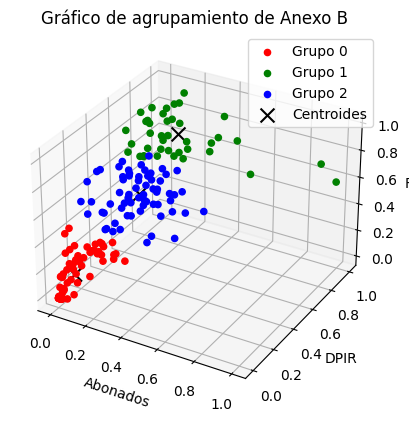

Número de elementos en cada grupo:
Grupo 2: 66
Grupo 1: 40
Grupo 0: 72


In [ ]:
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Importar Pandas
from sklearn.cluster import MiniBatchKMeans
from mpl_toolkits.mplot3d import Axes3D  # Para visualizar en 3D


# Extraer los datos de las columnas 'Abonados', 'DPIR' y 'FPI'
data = df2_normalized[['Abonados', 'DPIR', 'FPI']].values

# Realizar Mini Batch K-Means con K=3
n_clusters = 3  # Número de clústeres
batch_size = 45
mbk = MiniBatchKMeans(n_clusters=n_clusters, batch_size=batch_size, n_init=10, max_no_improvement=10, verbose=0)
mbk.fit(data)

# Obtener las etiquetas de clústeres
labels = mbk.labels_

# Visualizar el agrupamiento en tres dimensiones
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Definir colores para los clústeres
colors = ['r', 'g', 'b']

# Plotear puntos de cada clúster con un color sólido
for i in range(n_clusters):
    ax.scatter(data[labels == i, 0], data[labels == i, 1], data[labels == i, 2], c=colors[i], label=f'Grupo {i}', alpha=1)

# Marcar los centroides con una "X"
centroids = mbk.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='k', marker='x', s=100, label='Centroides',alpha=1)

ax.set_xlabel('Abonados')
ax.set_ylabel('DPIR')
ax.set_zlabel('FPI')
plt.legend()
plt.title('Gráfico de agrupamiento de Anexo B')
plt.show()

from collections import Counter

# Obtener las etiquetas de clústeres
labels = mbk.labels_

# Contar cuántos datos hay en cada clúster
cluster_counts = Counter(labels)

# Imprimir el número de datos en cada clúster
print("Número de elementos en cada grupo:")
for cluster, count in cluster_counts.items():
    print(f'Grupo {cluster}: {count}')